In [2]:
import numpy as np
import fileread as fr
import predefined as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf

def gauss(x,*pars):
    a,mu,sigma = pars
    return a*np.exp(-(x-mu)**2./(2.*sigma**2.))

def lingauss(x,*pars):
    a,mu,sigma,m,b = pars
    return a*np.exp(-(x-mu)**2./(2.*sigma**2.))+m*x+b

def erfgauss(x,*pars):
    a,mu,sigma,b,c,d=pars
    return a*np.exp(-(x-mu)**2./(2.*sigma**2.))+b*erf(x-mu)+d

def offgauss(x,*pars):
    a,mu,sigma,b=pars
    return a*np.exp(-(x-mu)**2./(2.*sigma**2.))+b

fil='./shaping_time_scan-363pk-lingauss.npy'
col=4

sigs=np.load(fil)
x,y=np.concatenate((np.linspace(10,100,10),np.linspace(200,1000,9))),np.concatenate((np.linspace(10,100,10),np.linspace(200,1000,9)))
x,y=np.meshgrid(x,y)
z=np.zeros_like(x)
for i in range(len(sigs)):
	if col ==4:   
		z[i/19,i%19]= abs(sigs[i,col])
	elif col ==3:
		z[i/19,i%19]= abs((sigs[i,col])*0.157)
	else:
		z[i/19,i%19]= sigs[i,col]
    #print i/5,i%5,sigs[i,4]
z=np.transpose(z)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


[ -5.54073148e+03   2.20092603e+03  -7.03133929e+00   2.26450392e+02
  -4.88722188e+05] 5


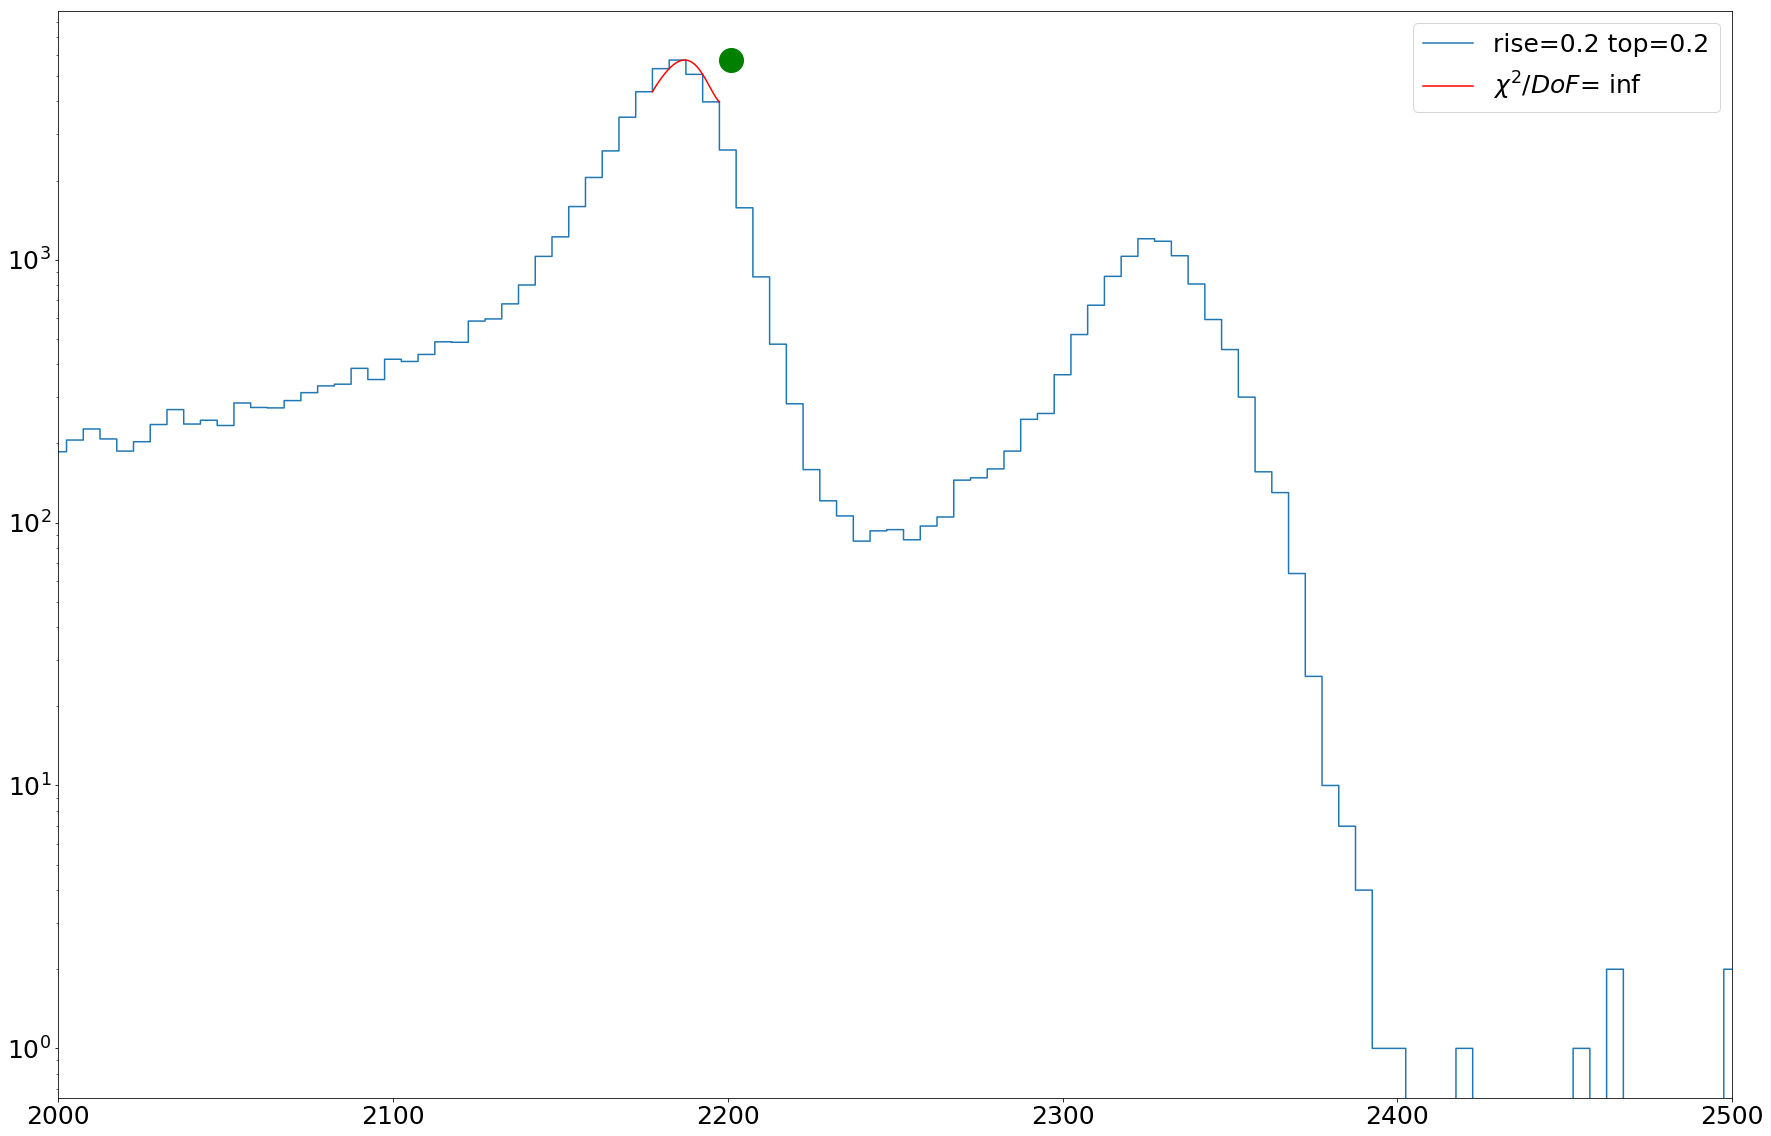

[ -5.48508176e+04   2.22729665e+03  -2.66462180e+01   9.73011378e+02
  -2.10483834e+06] 8


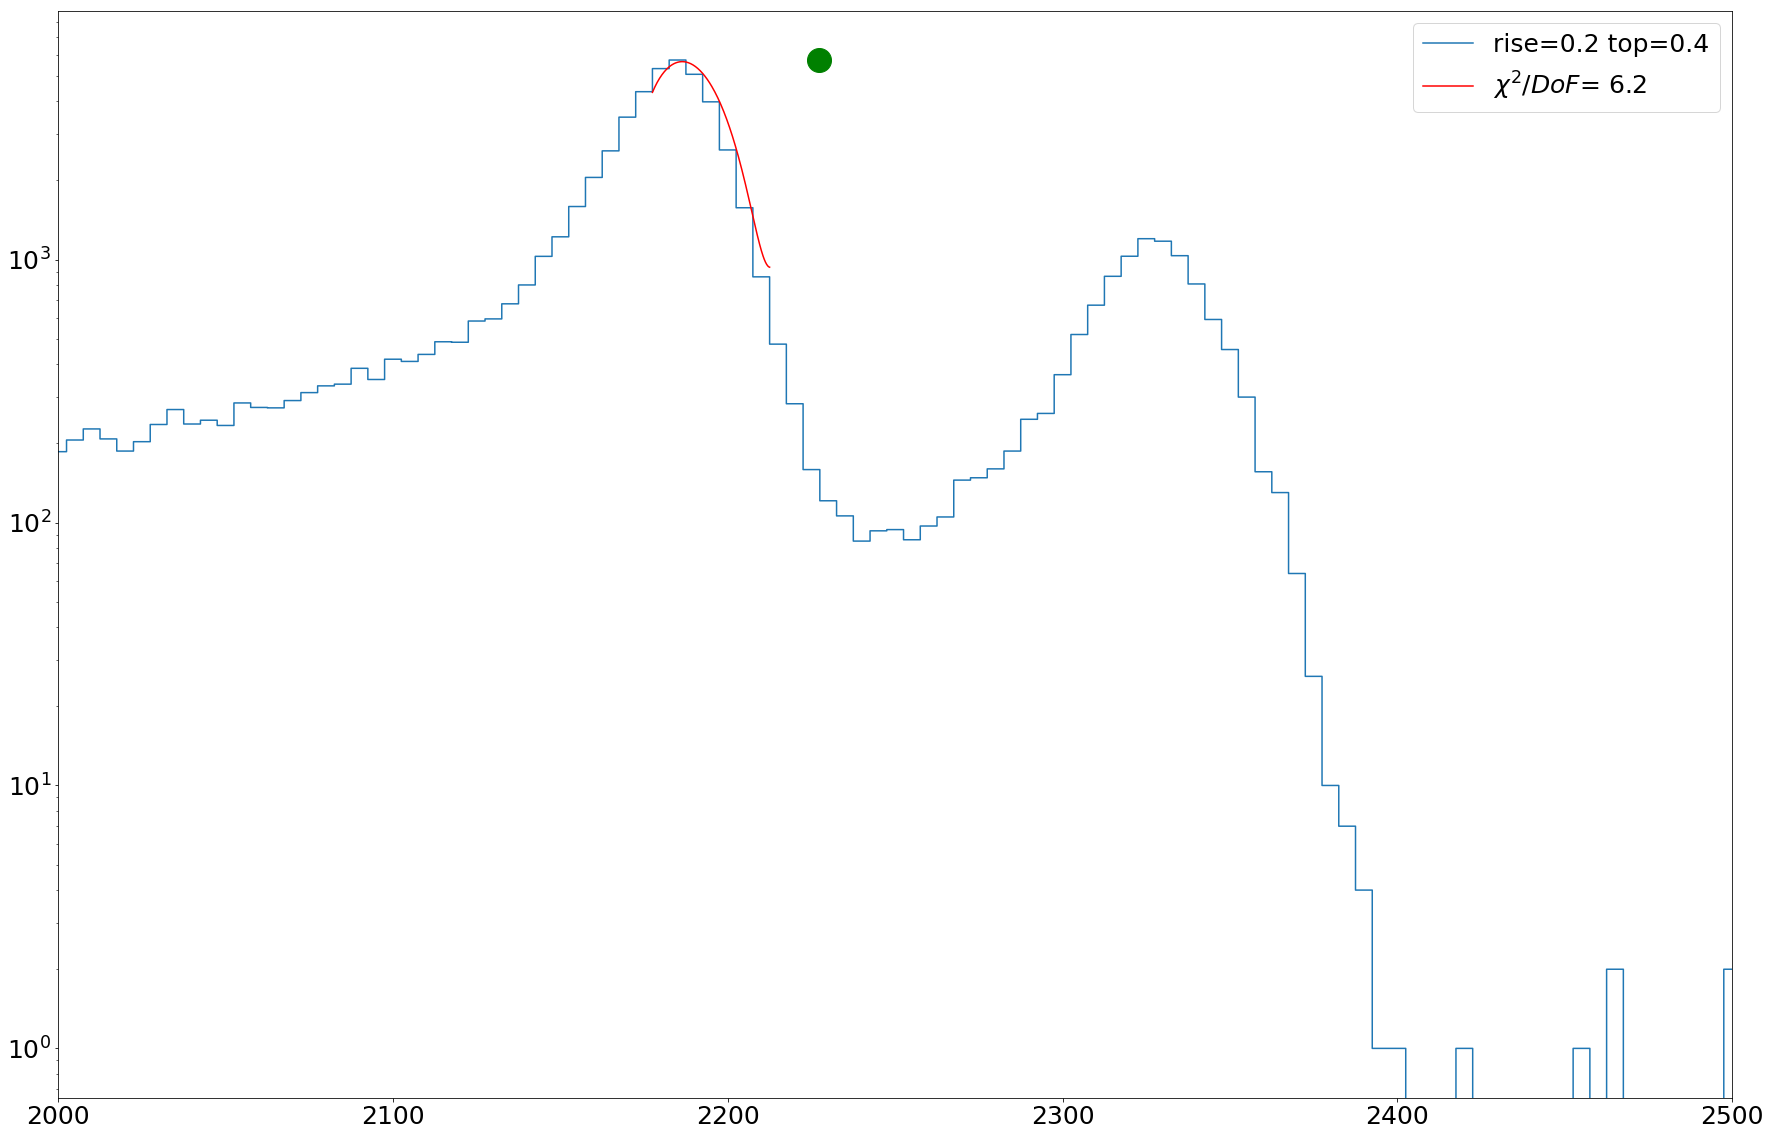

[ -1.01817955e+08   2.60966506e+03  -4.06903174e+02   1.51515045e+05
  -2.71993094e+08] 11


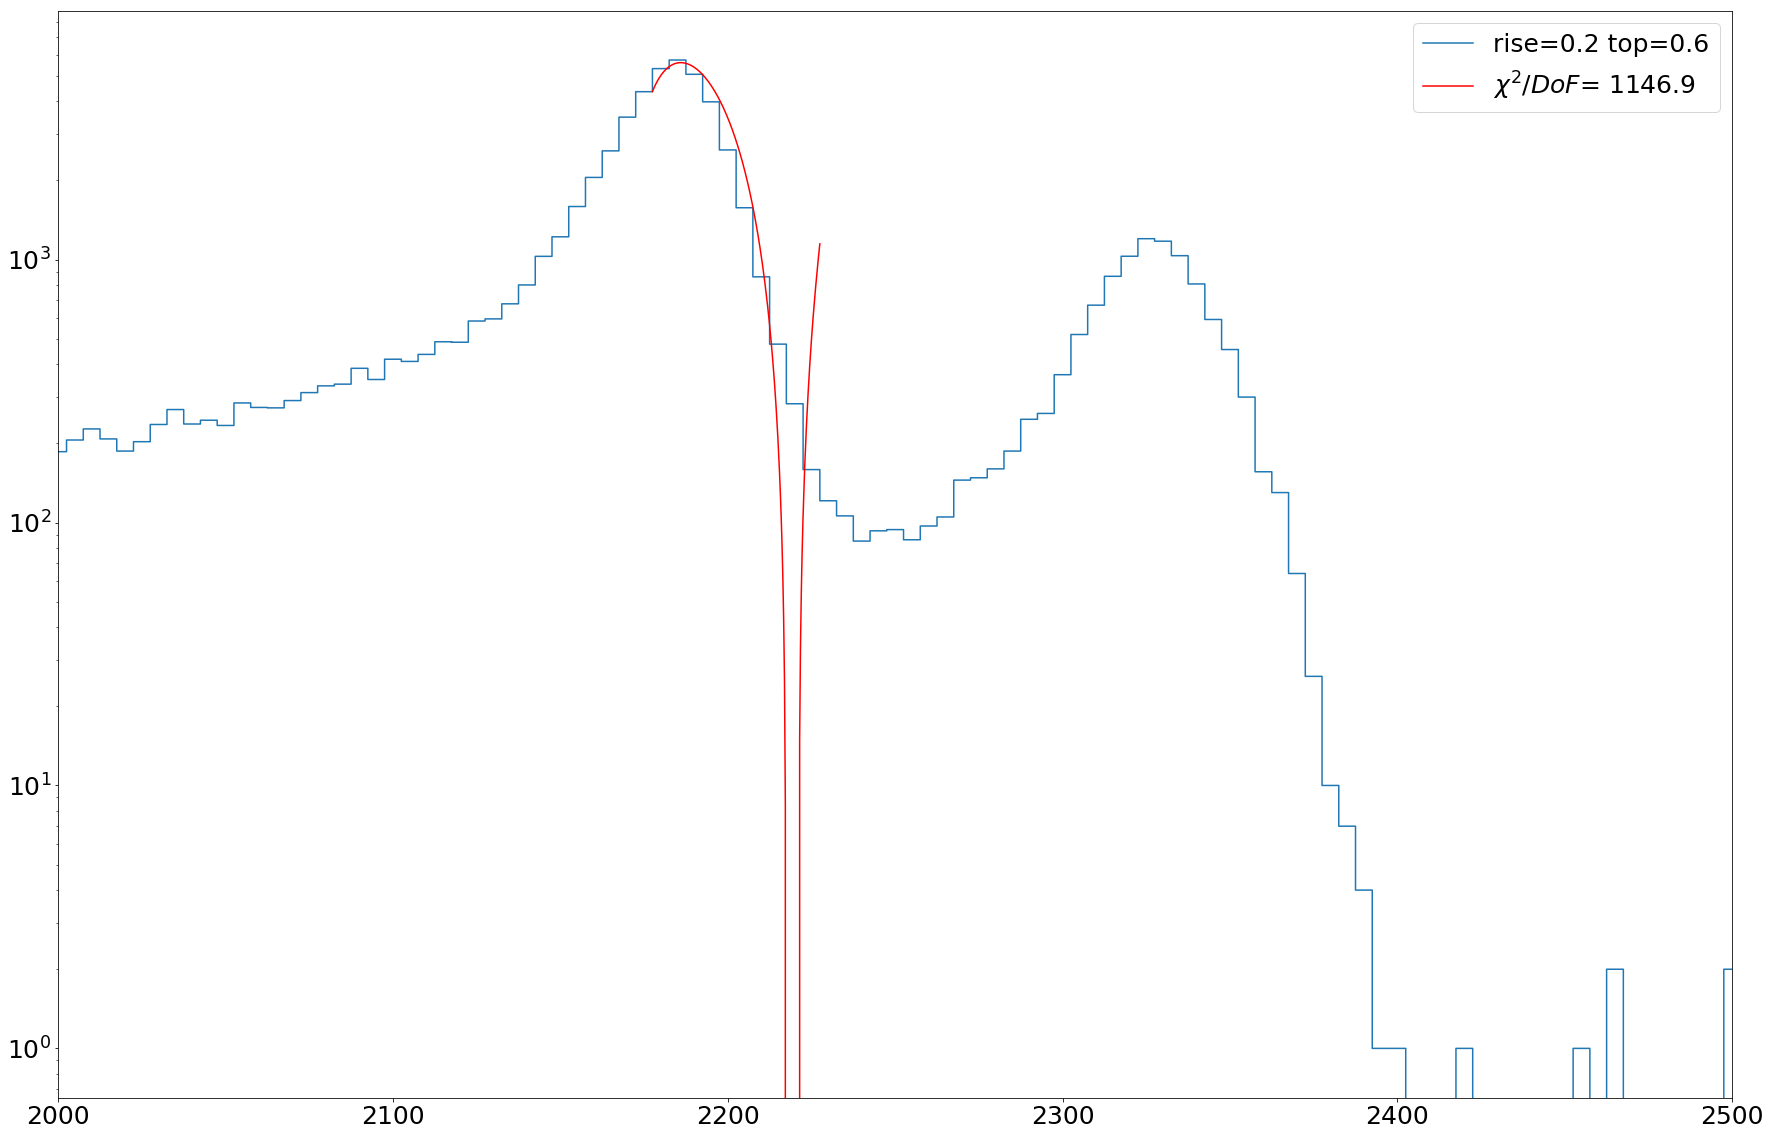

[  5.03373963e+03   2.18716027e+03  -1.17261424e+01  -1.11571013e+01
   2.50566227e+04] 14


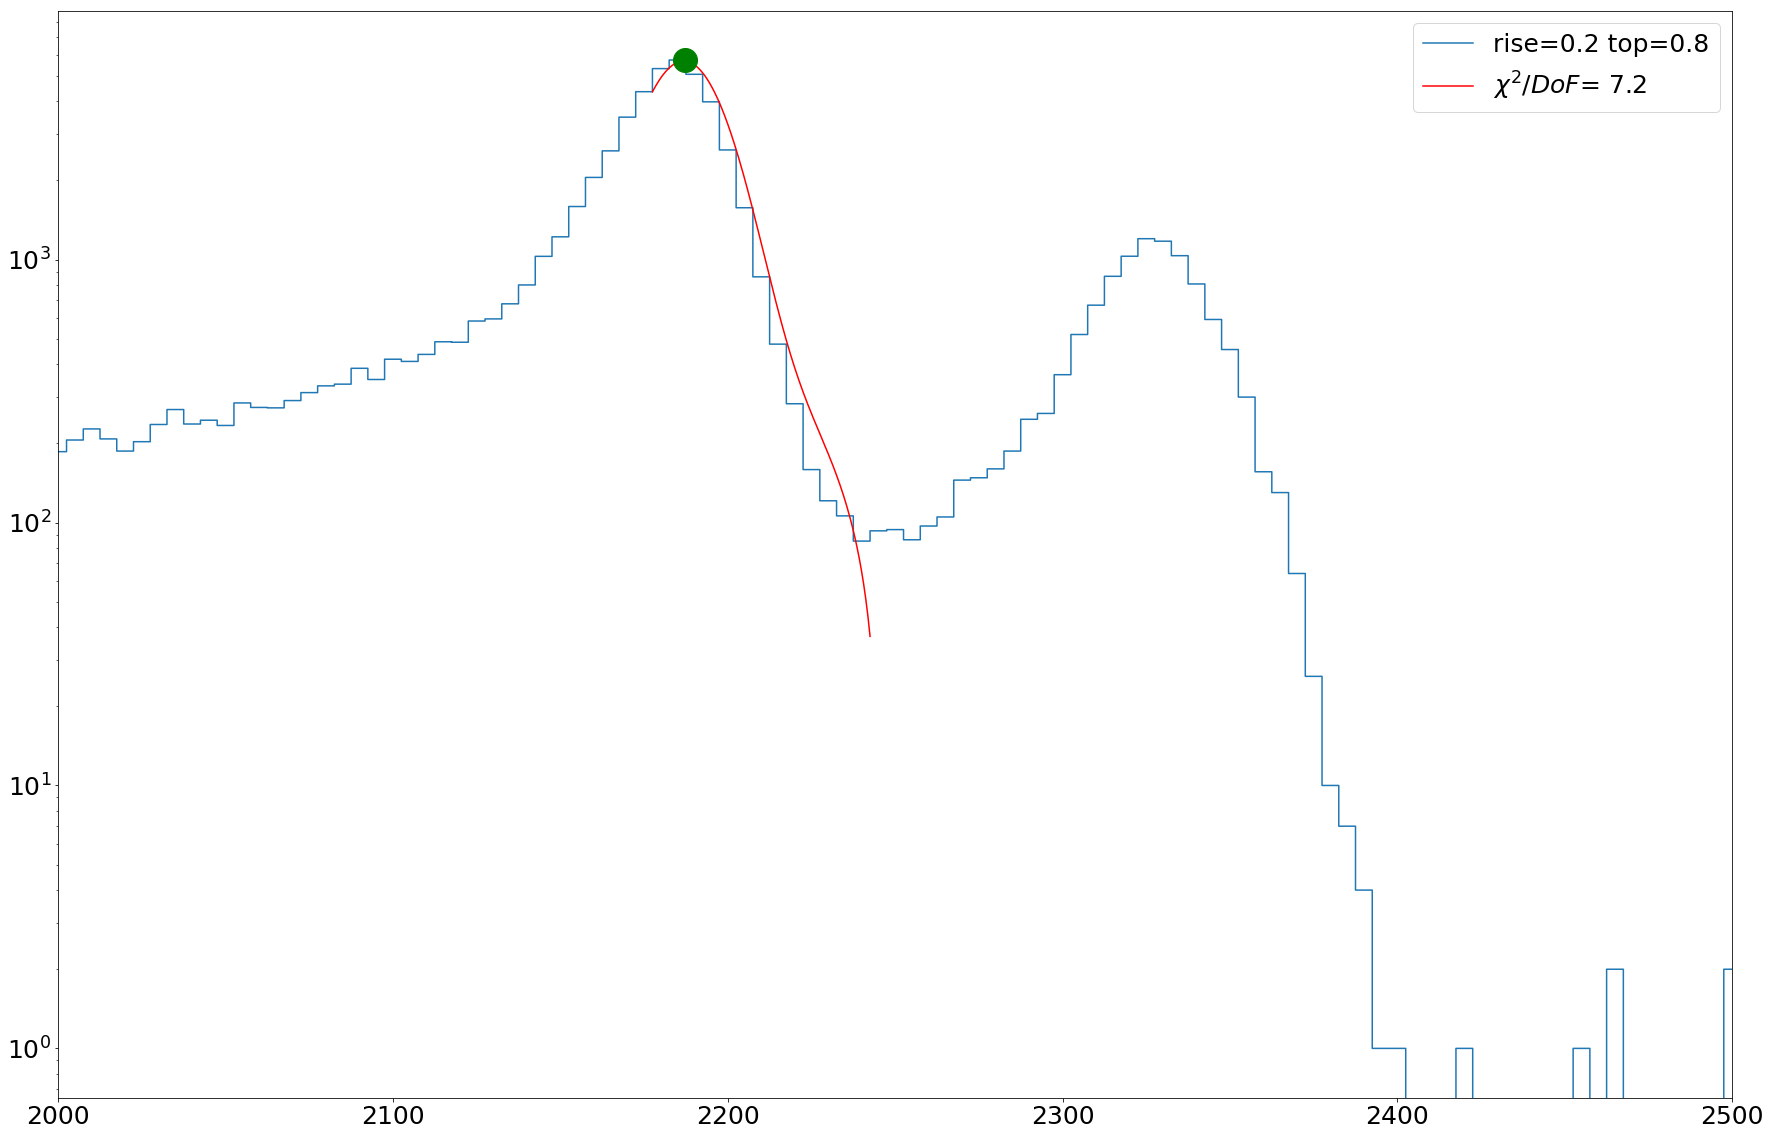

[  5.16460017e+03   2.18703482e+03  -1.19038080e+01  -7.67332769e+00
   1.73057538e+04] 16


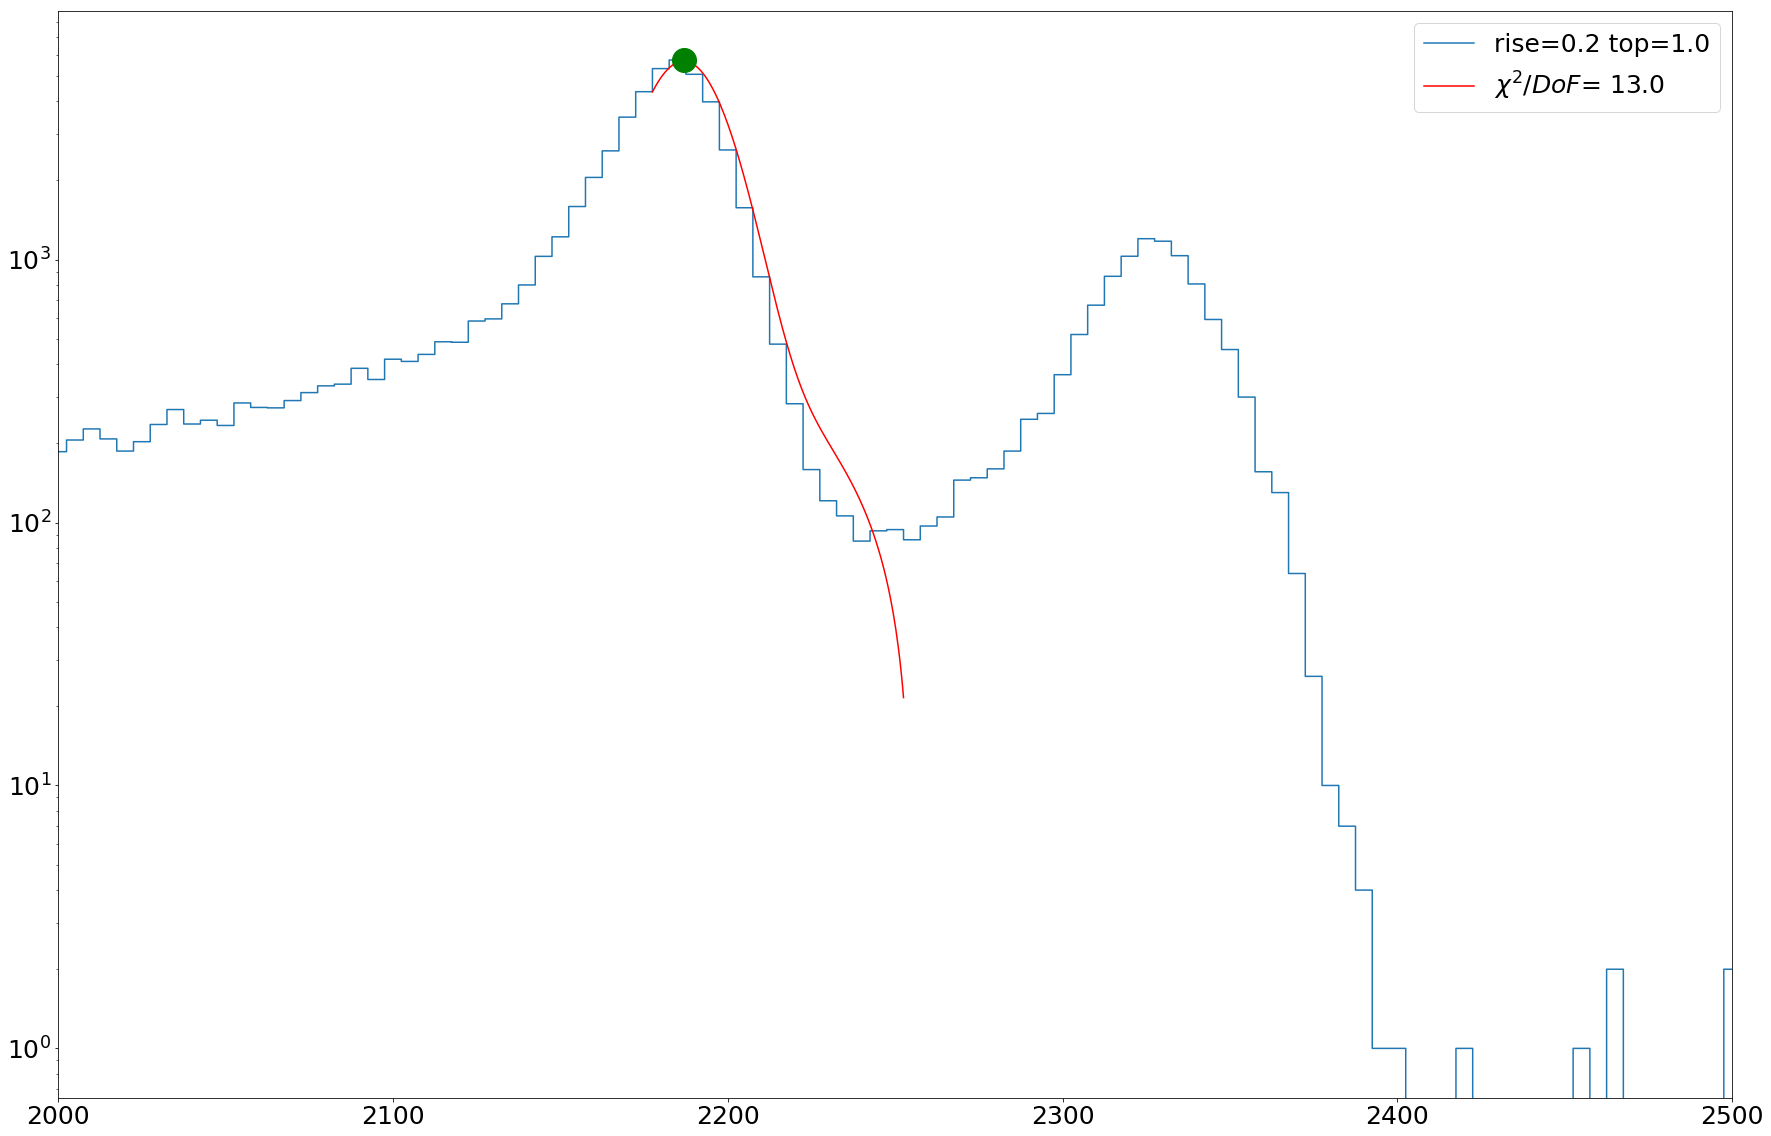

[ -9.10870332e+04   2.14051091e+03  -3.35703570e+01  -1.43151706e+03
   3.17125776e+06] 8


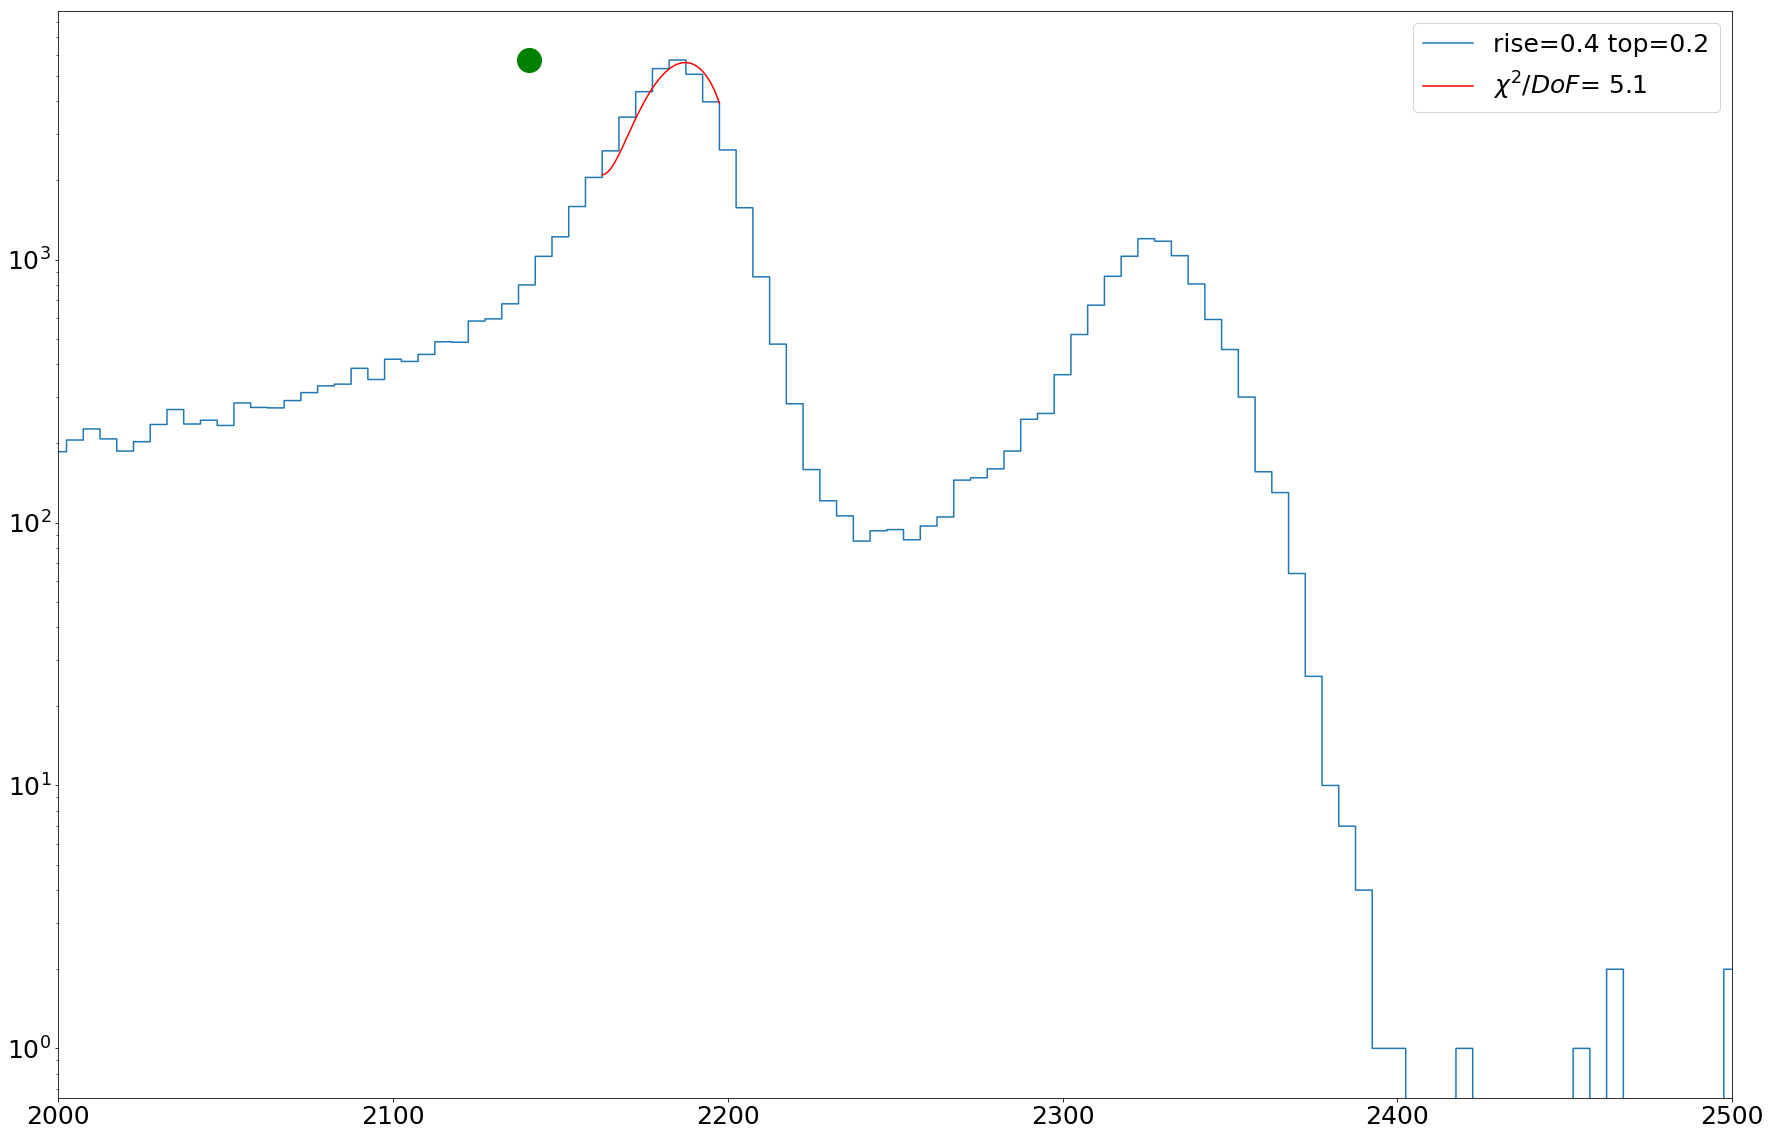

[  4.58974202e+03   2.18756309e+03  -1.14154413e+01  -2.55083107e+01
   5.68710178e+04] 11


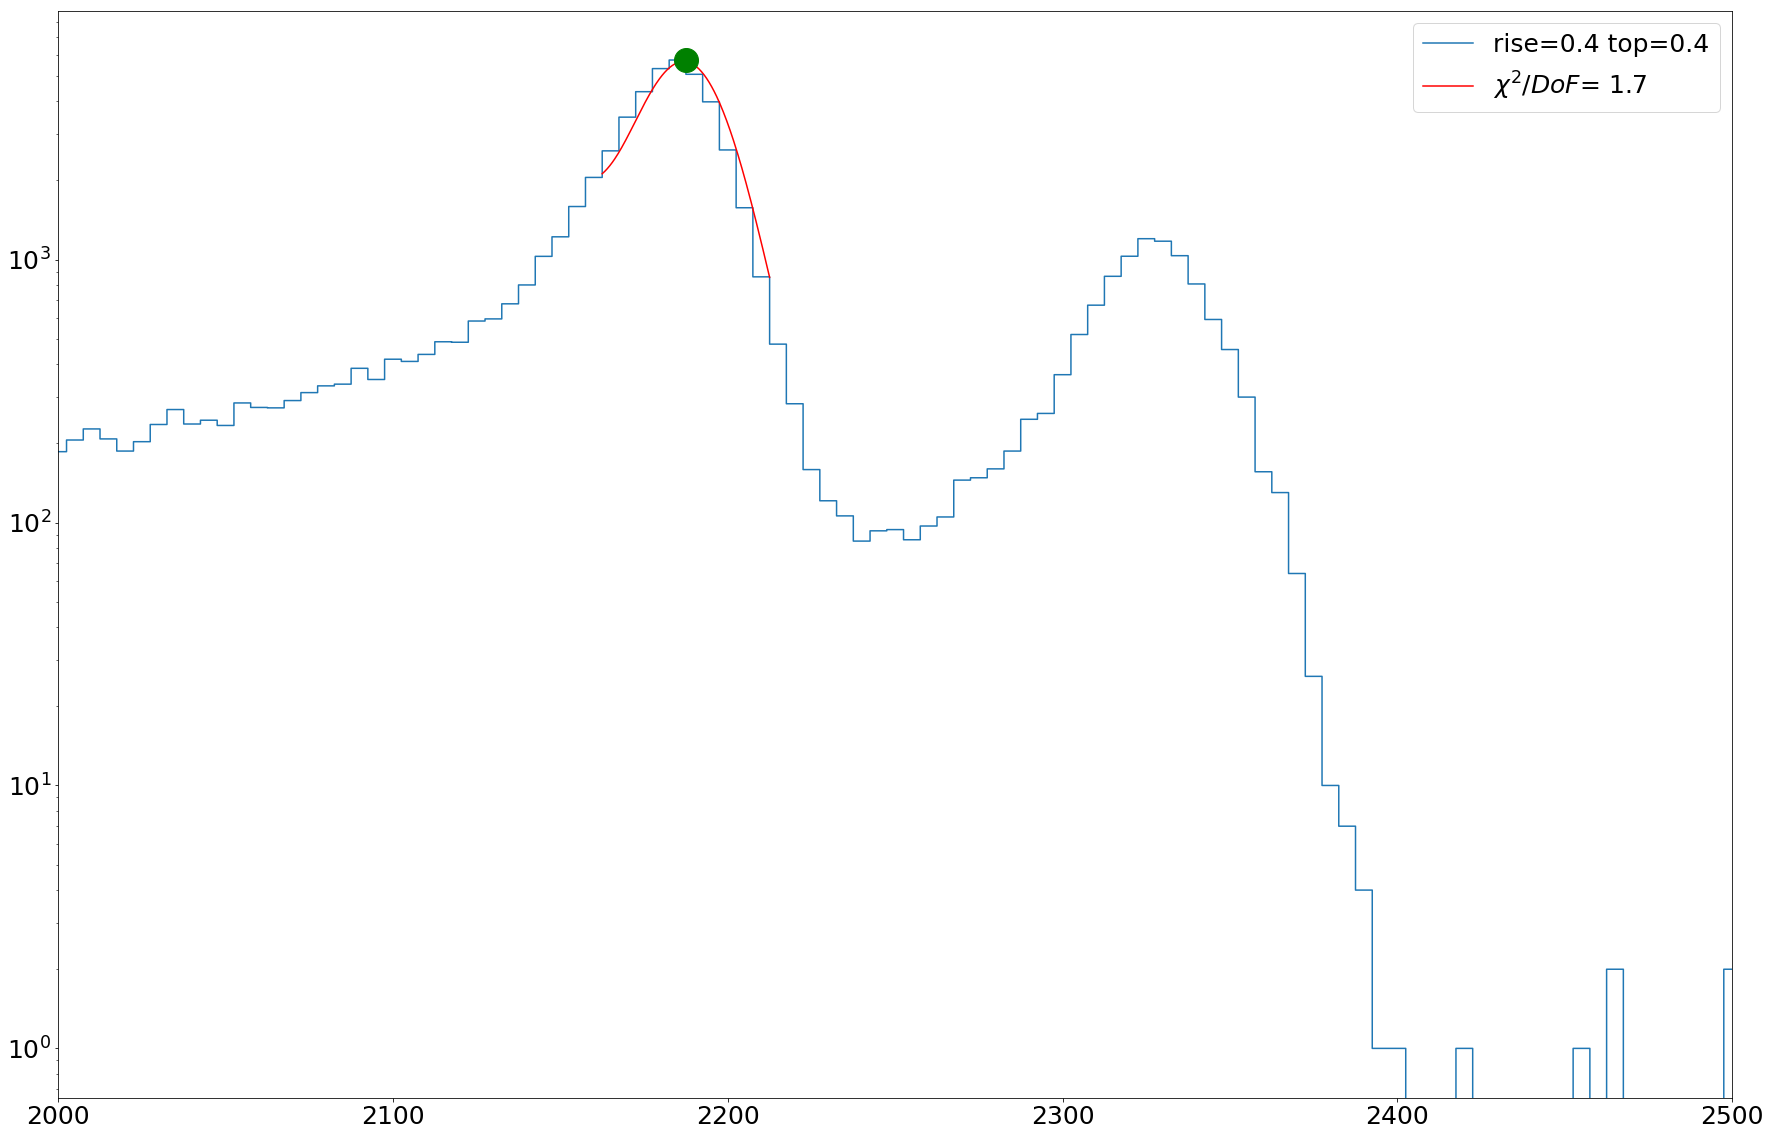

[ -1.62346124e+04   2.22352270e+03  -1.85488827e+01   2.45235952e+02
  -5.28627068e+05] 14


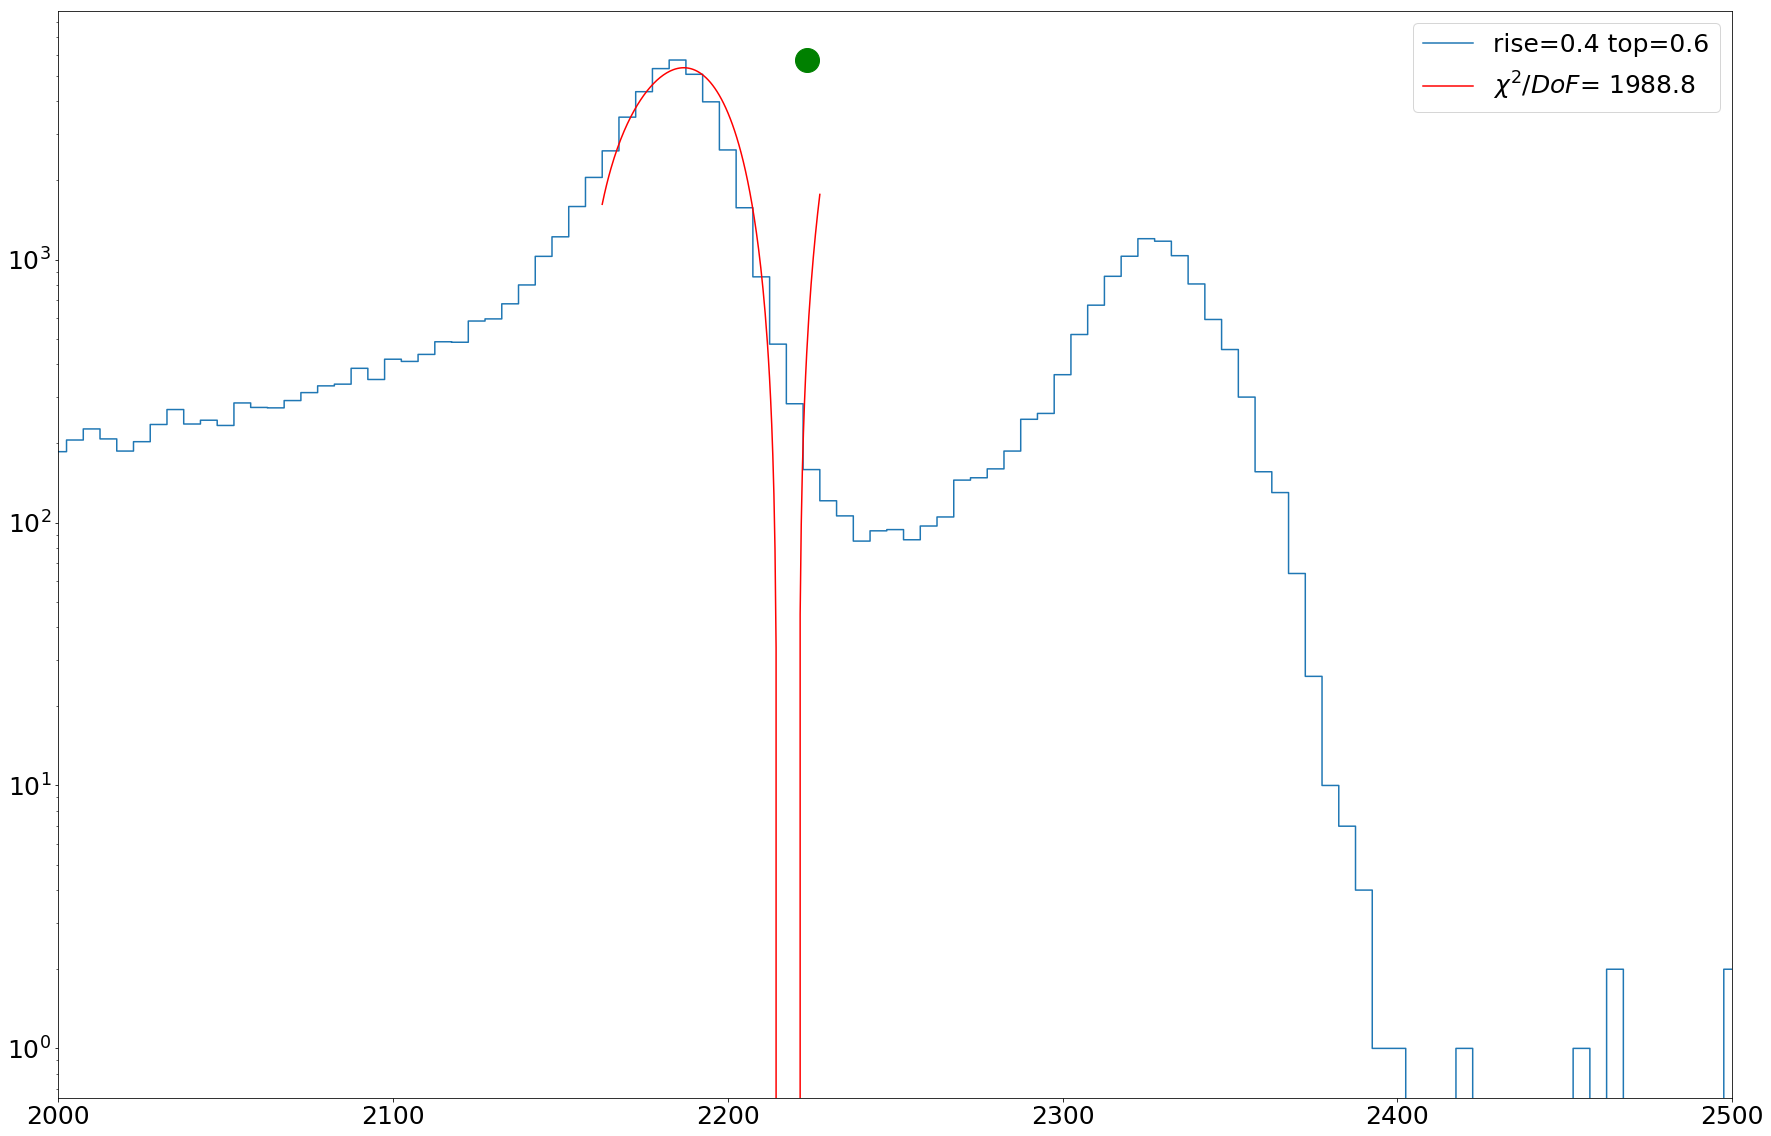

[ -3.03889451e+04   2.23804536e+03  -2.92988877e+01   3.78869249e+02
  -8.16694068e+05] 17


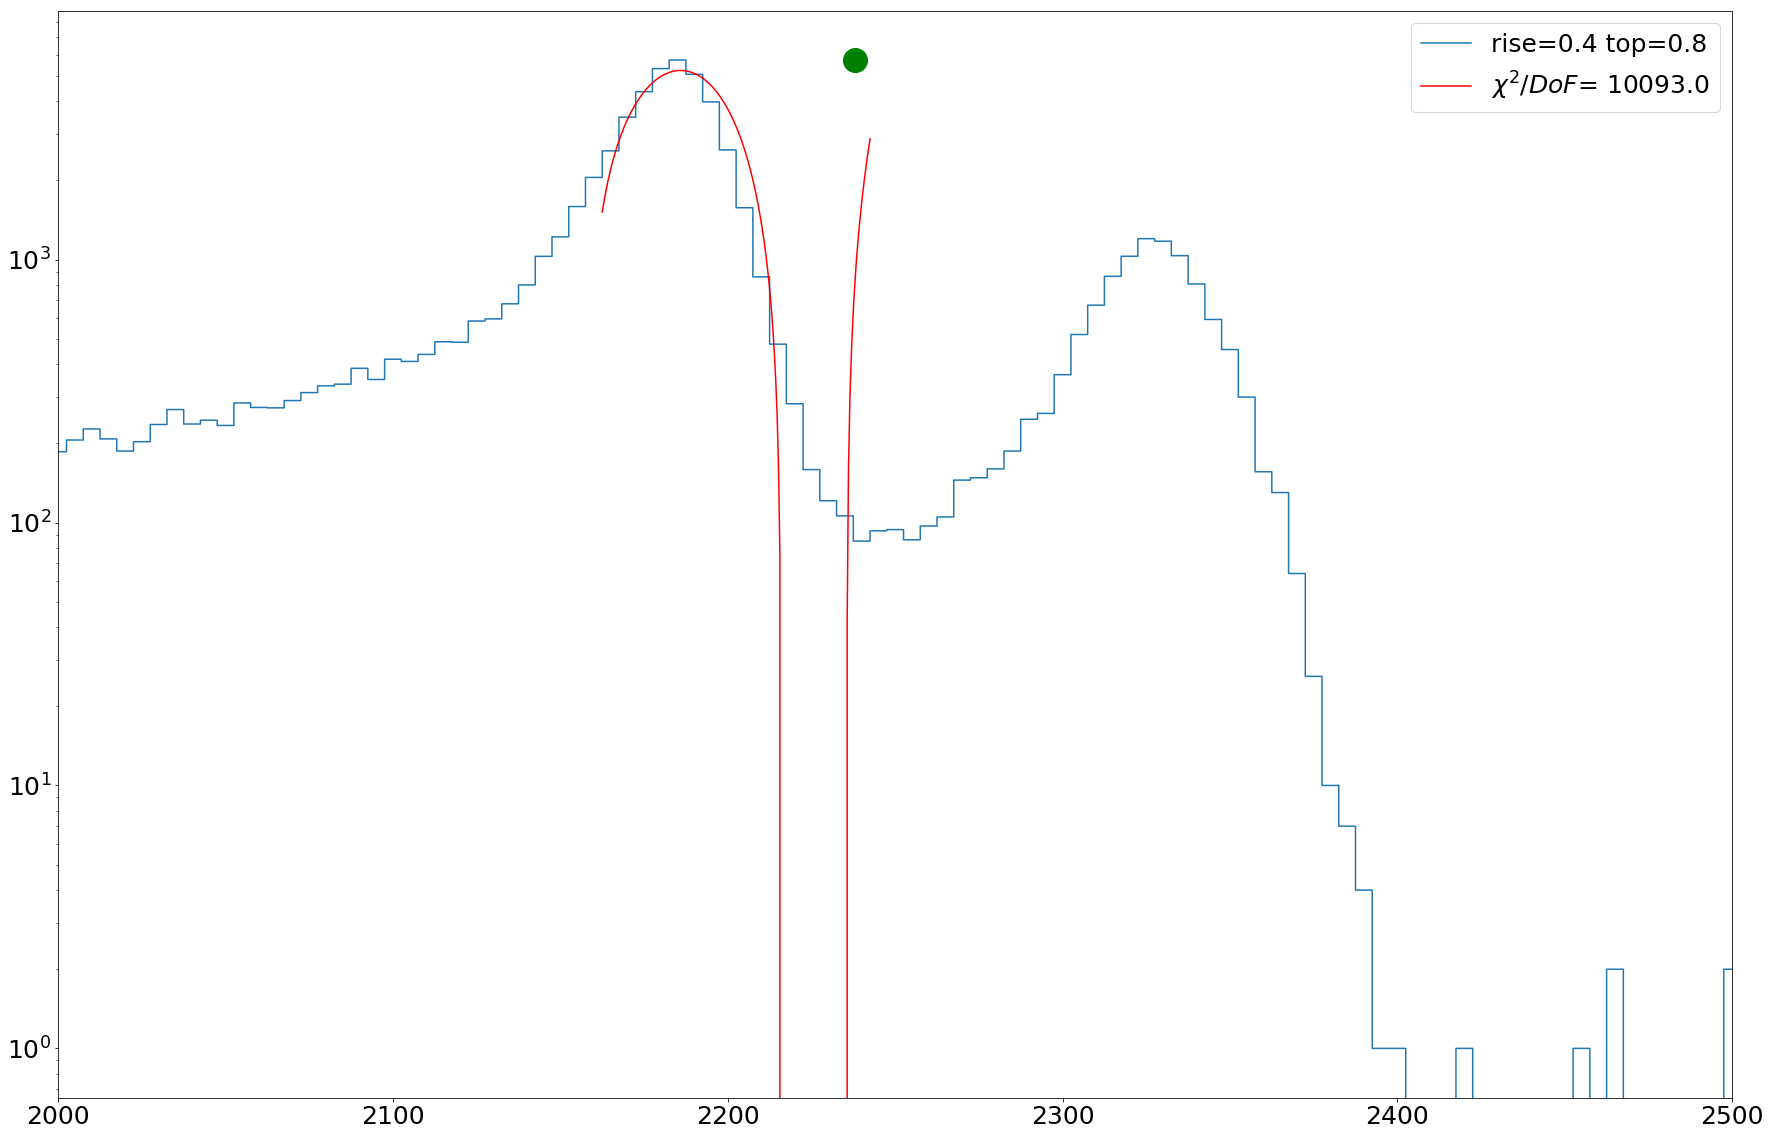

[  4.52726942e+03   2.18743064e+03  -1.12593965e+01  -2.31493786e+01
   5.17790118e+04] 19


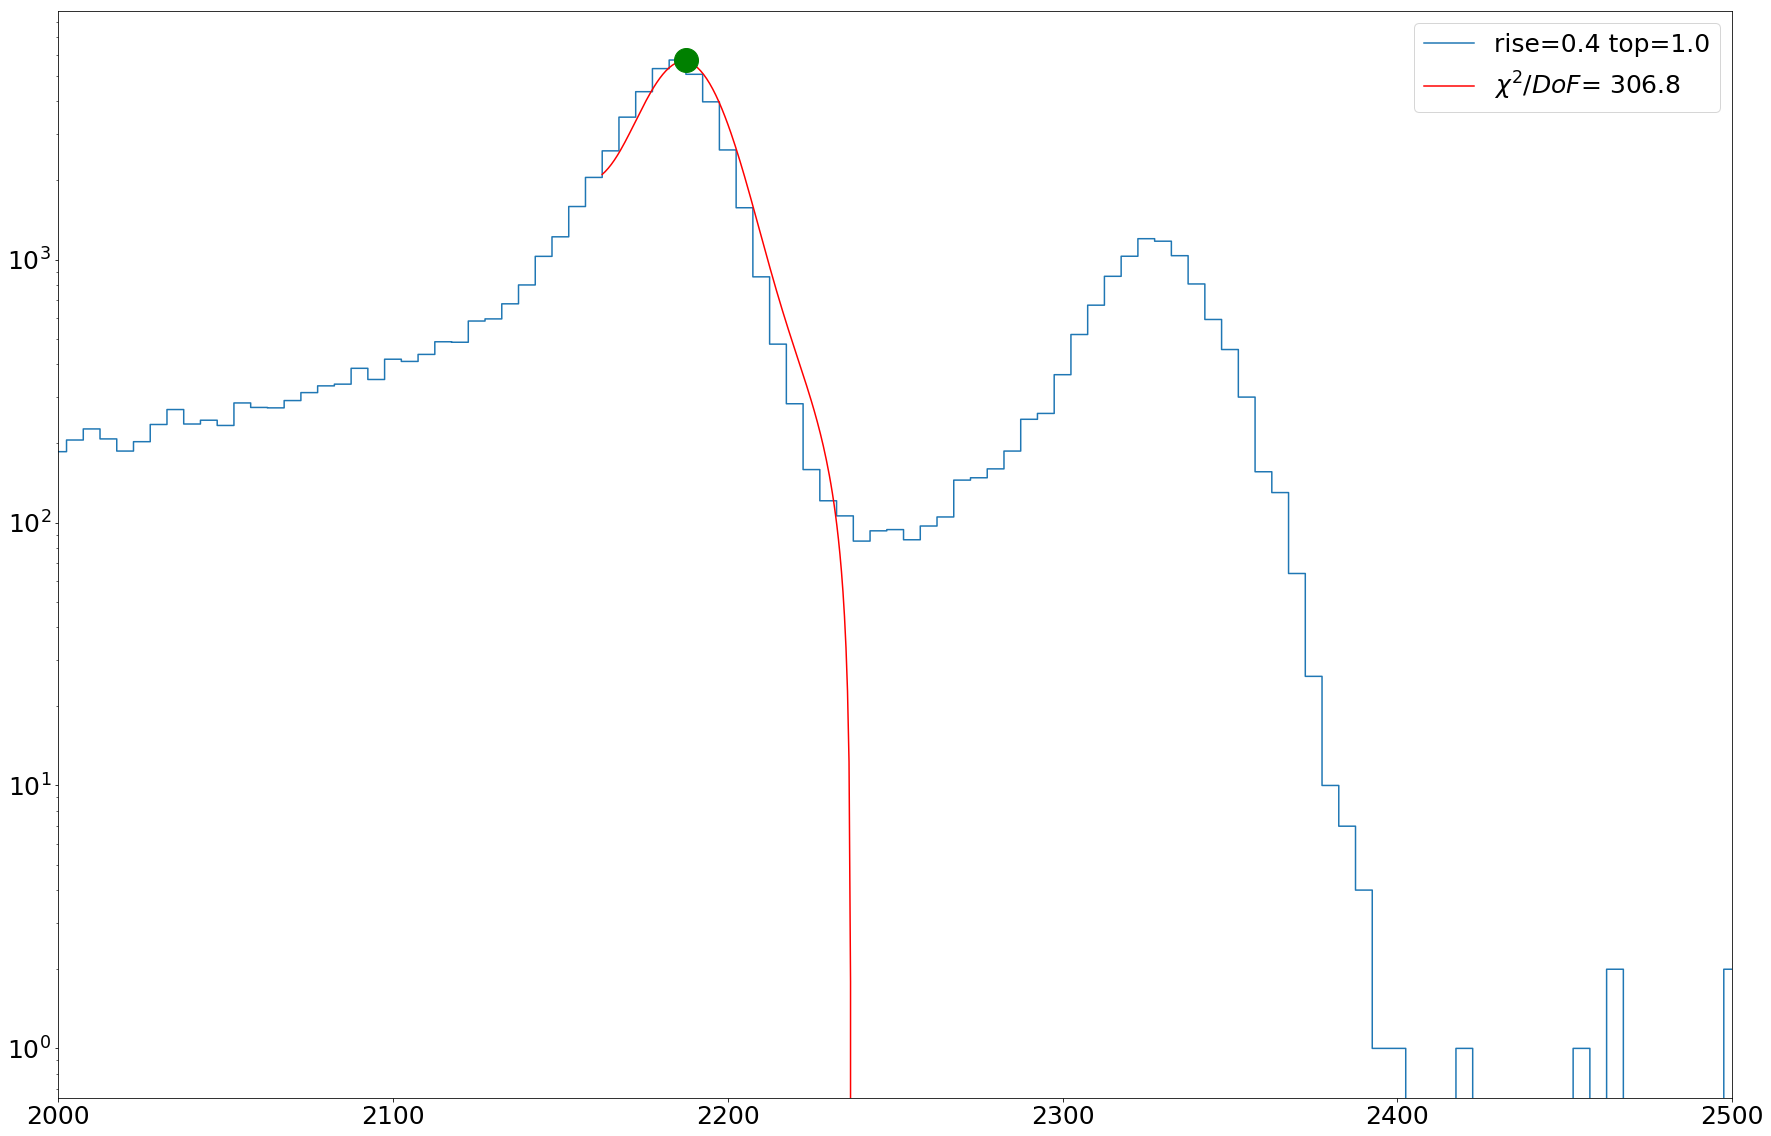

[ -6.88403770e+07   1.77620884e+03  -3.93961448e+02  -1.05787355e+05
   2.71333611e+08] 11


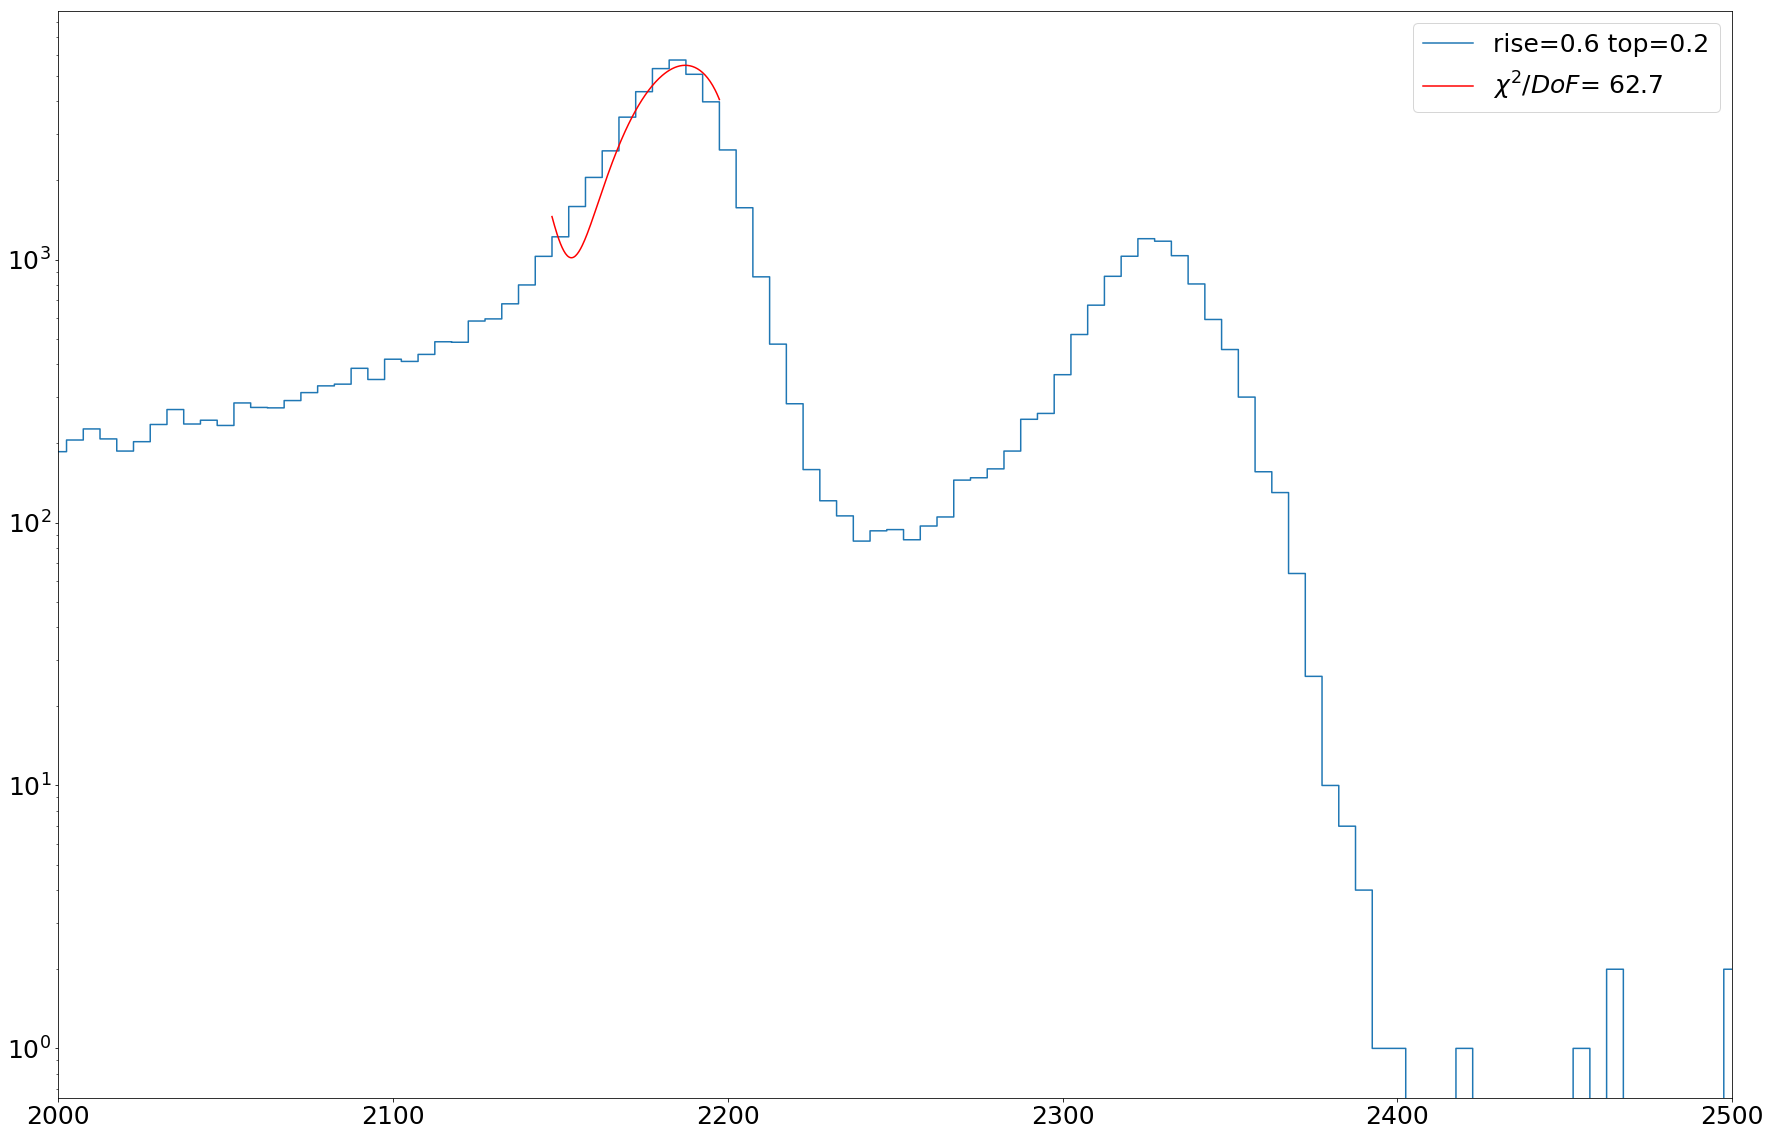

[ -2.77382042e+04   2.14188394e+03  -2.63701951e+01  -4.28954066e+02
   9.49854636e+05] 14


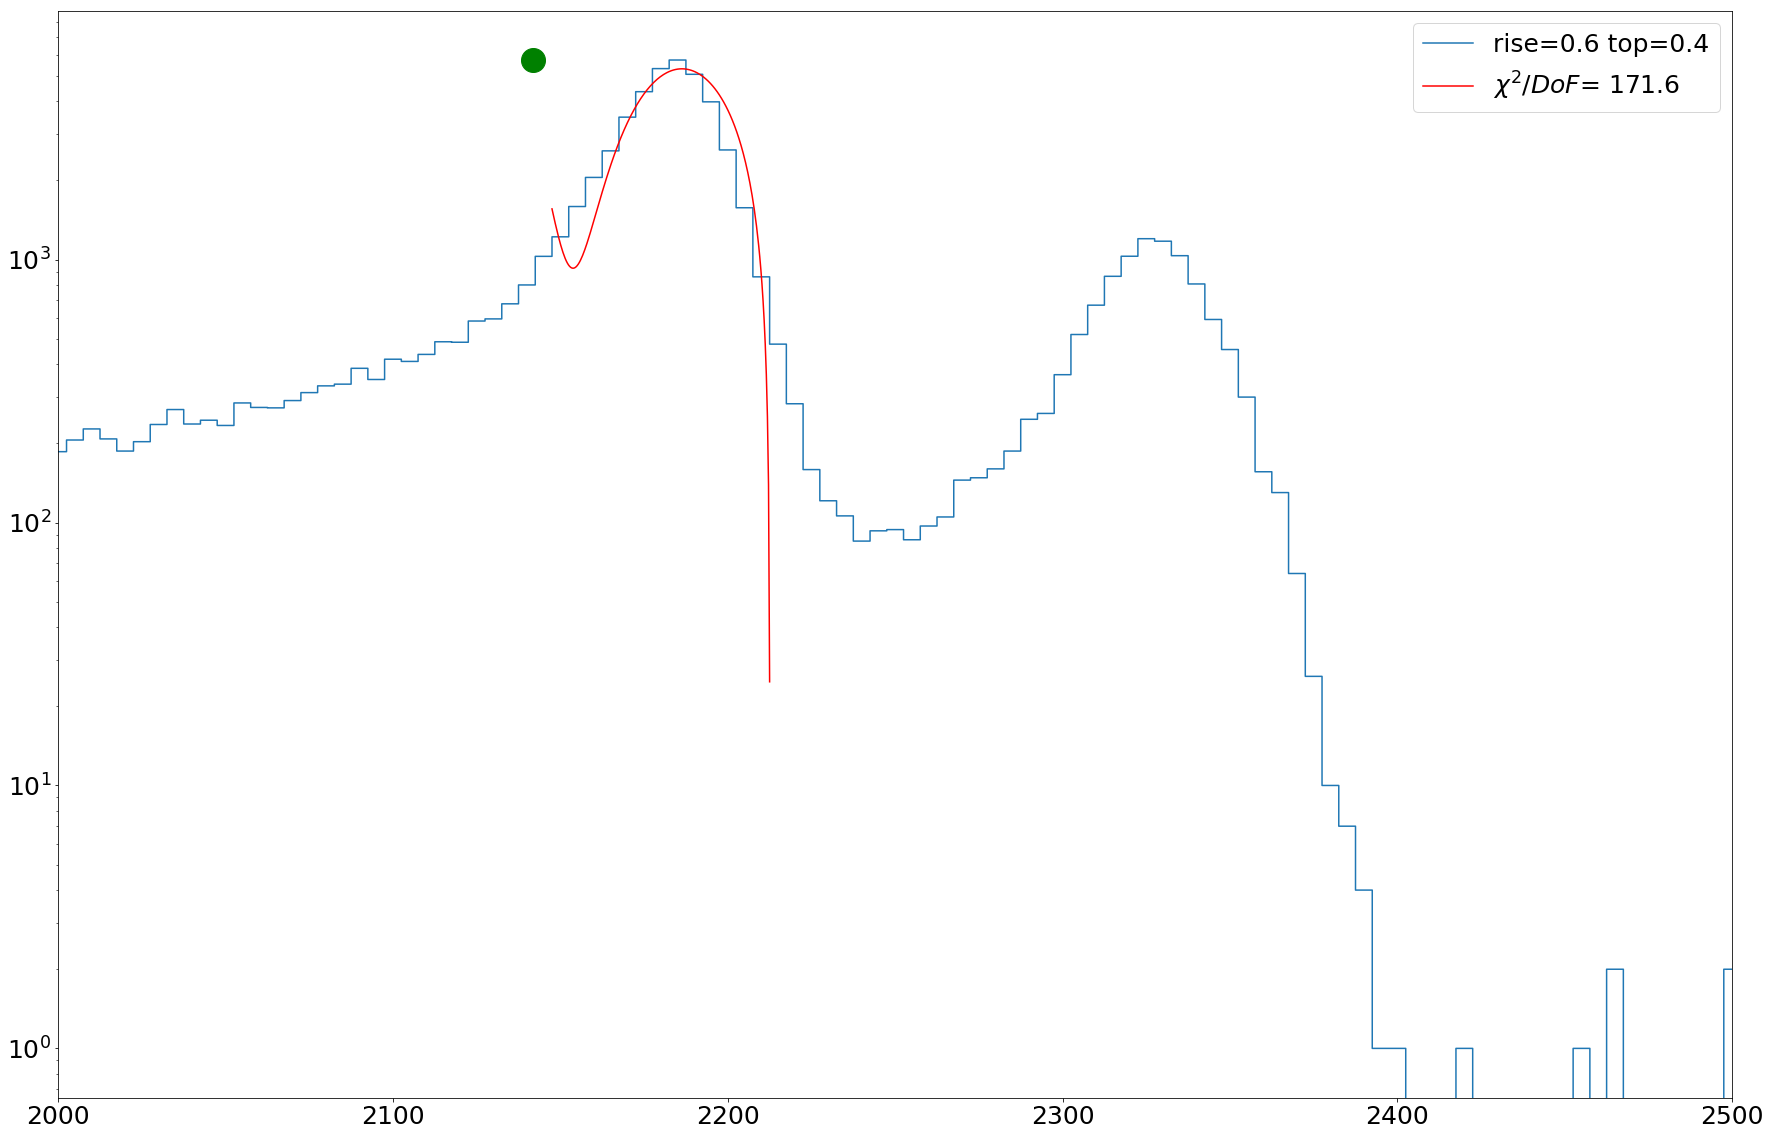

[  4.93471047e+03   2.18701708e+03  -1.24948552e+01  -1.66978437e+01
   3.72021012e+04] 17


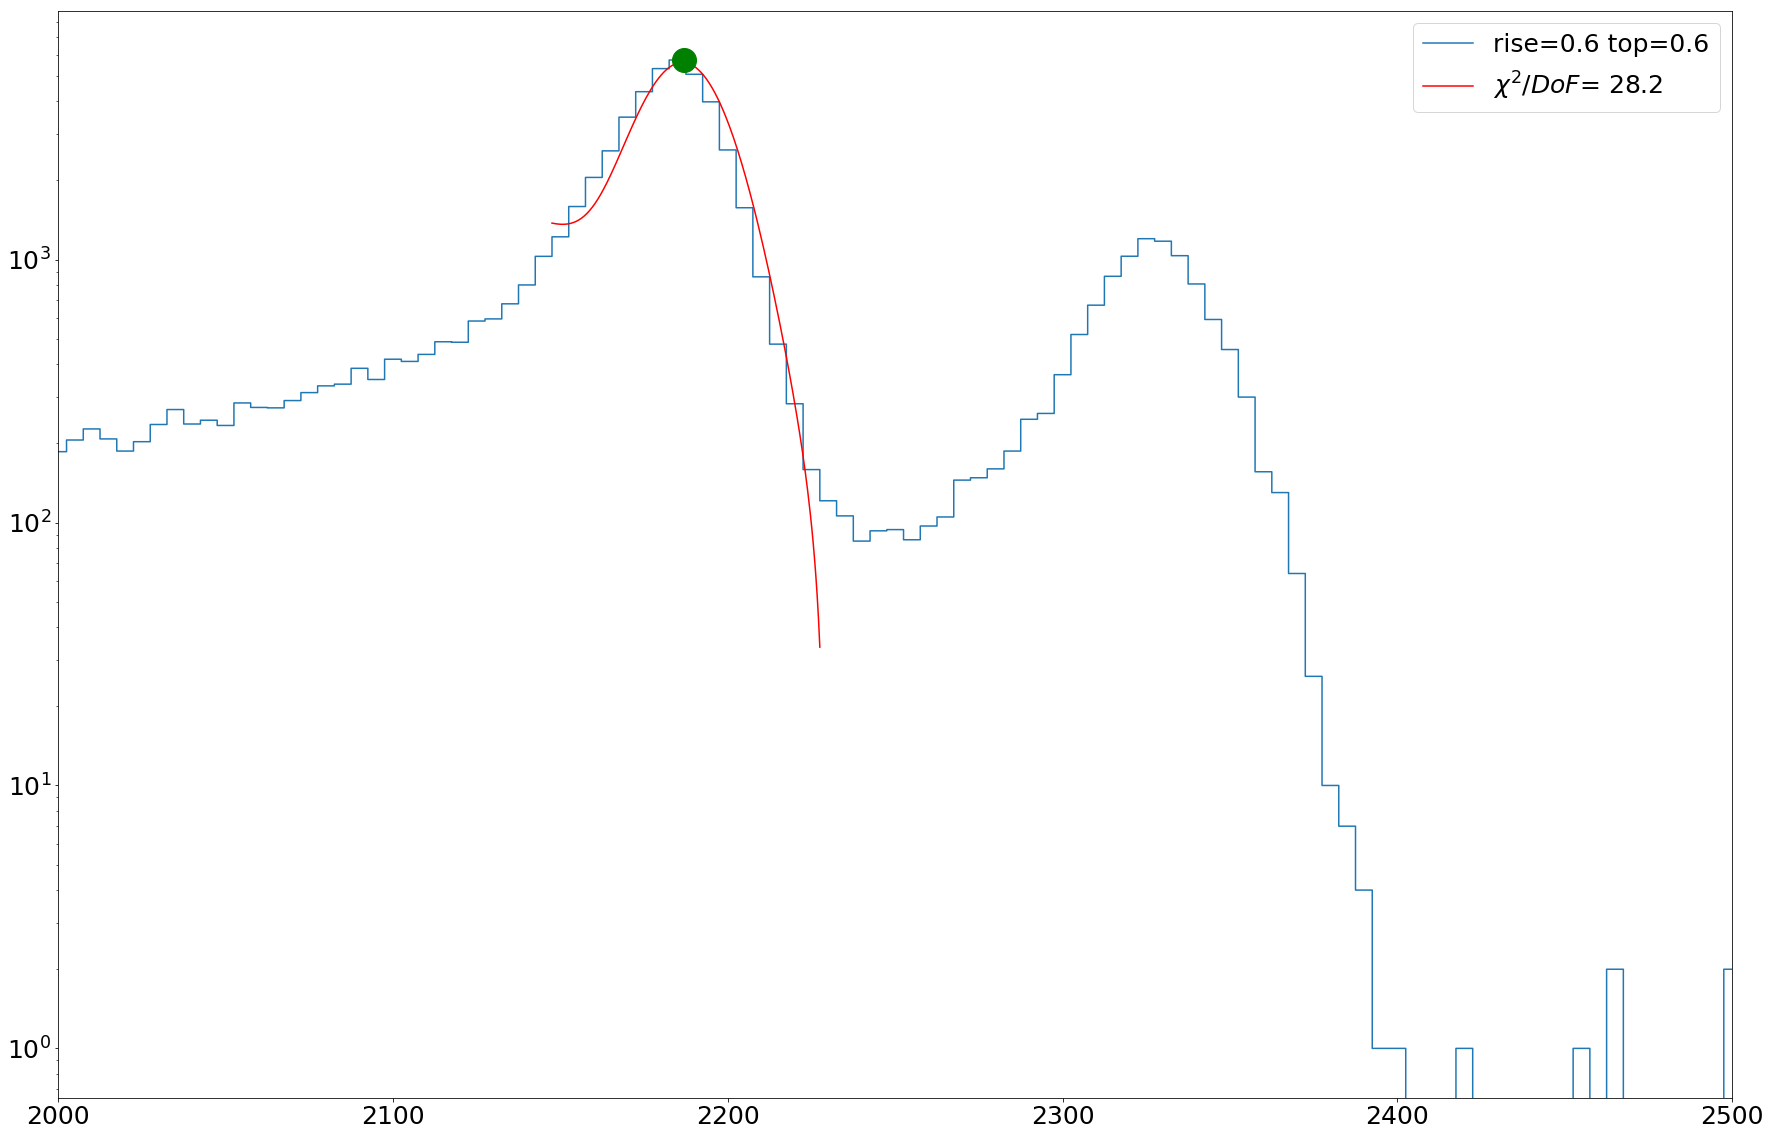

[  4.90311205e+03   2.18696918e+03  -1.24118974e+01  -1.58770829e+01
   3.54418724e+04] 20


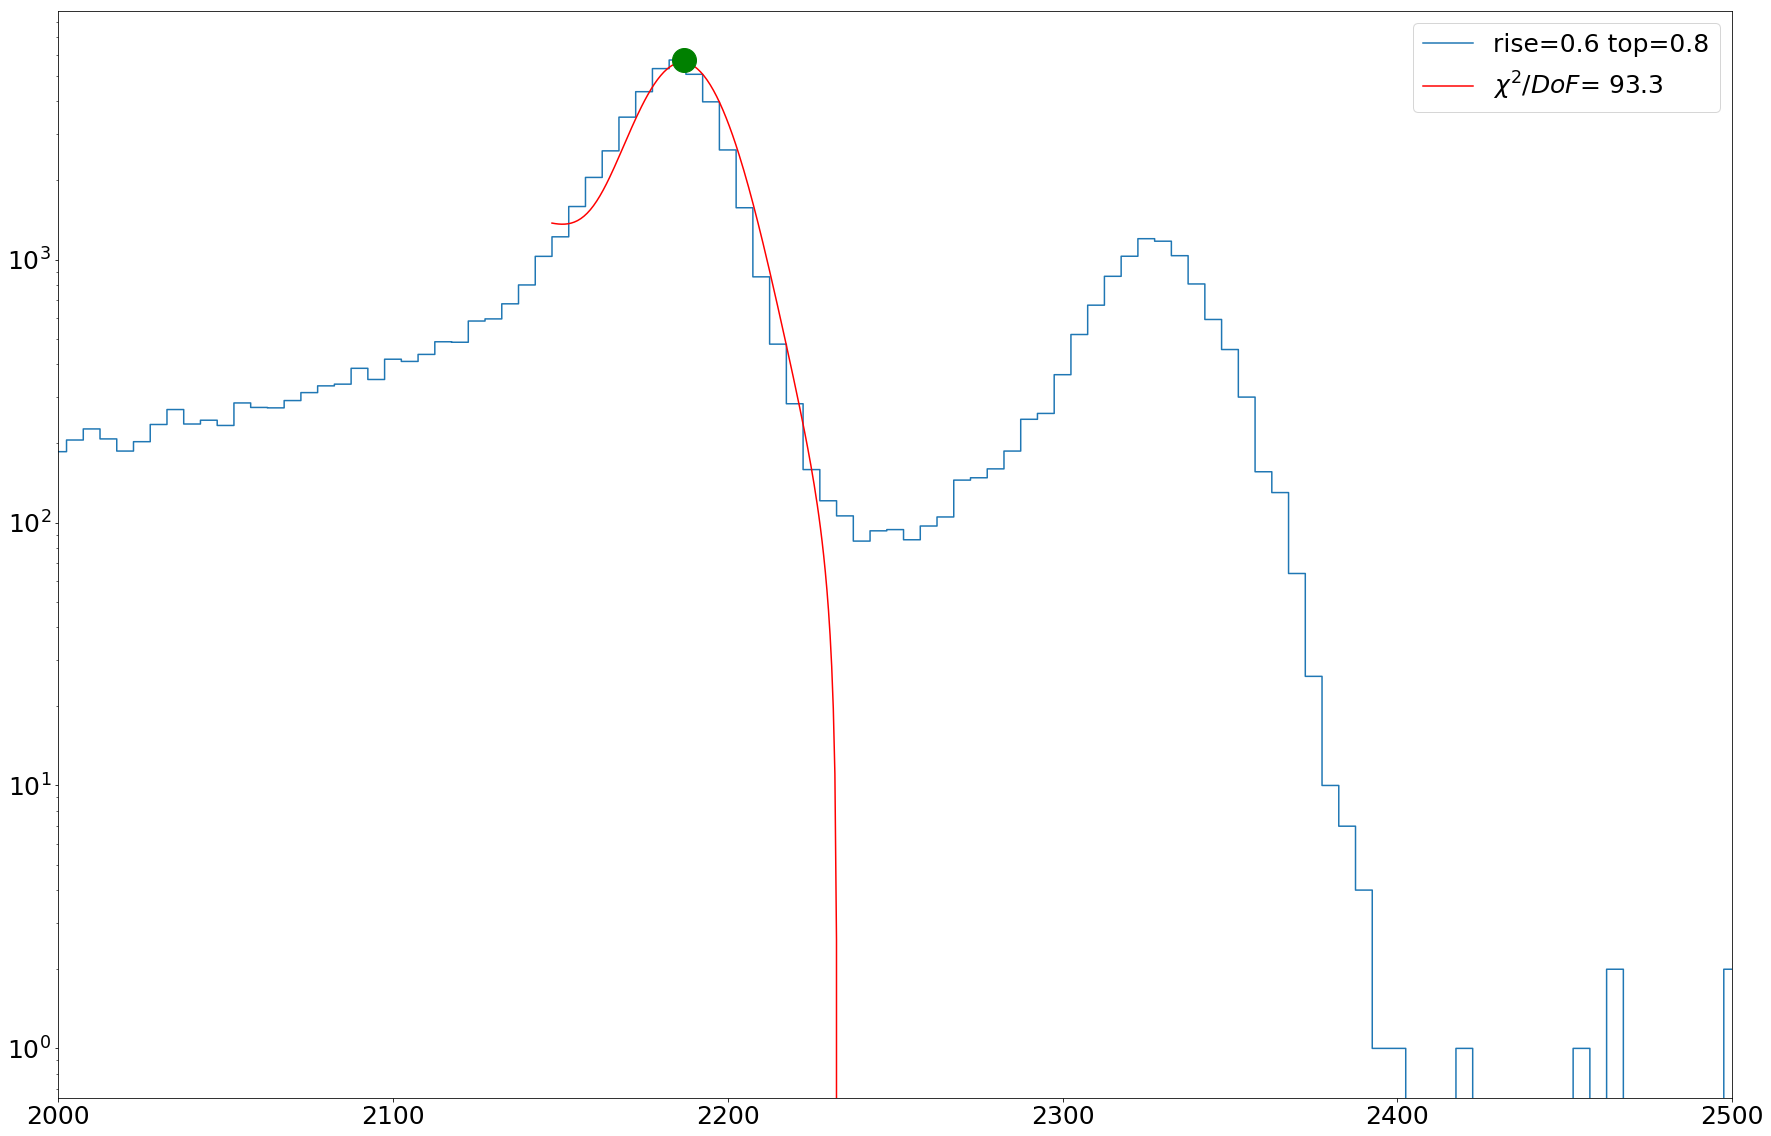

[ -1.02646057e+04   2.15063760e+03   1.61134094e+01  -1.51970854e+02
   3.38215899e+05] 22


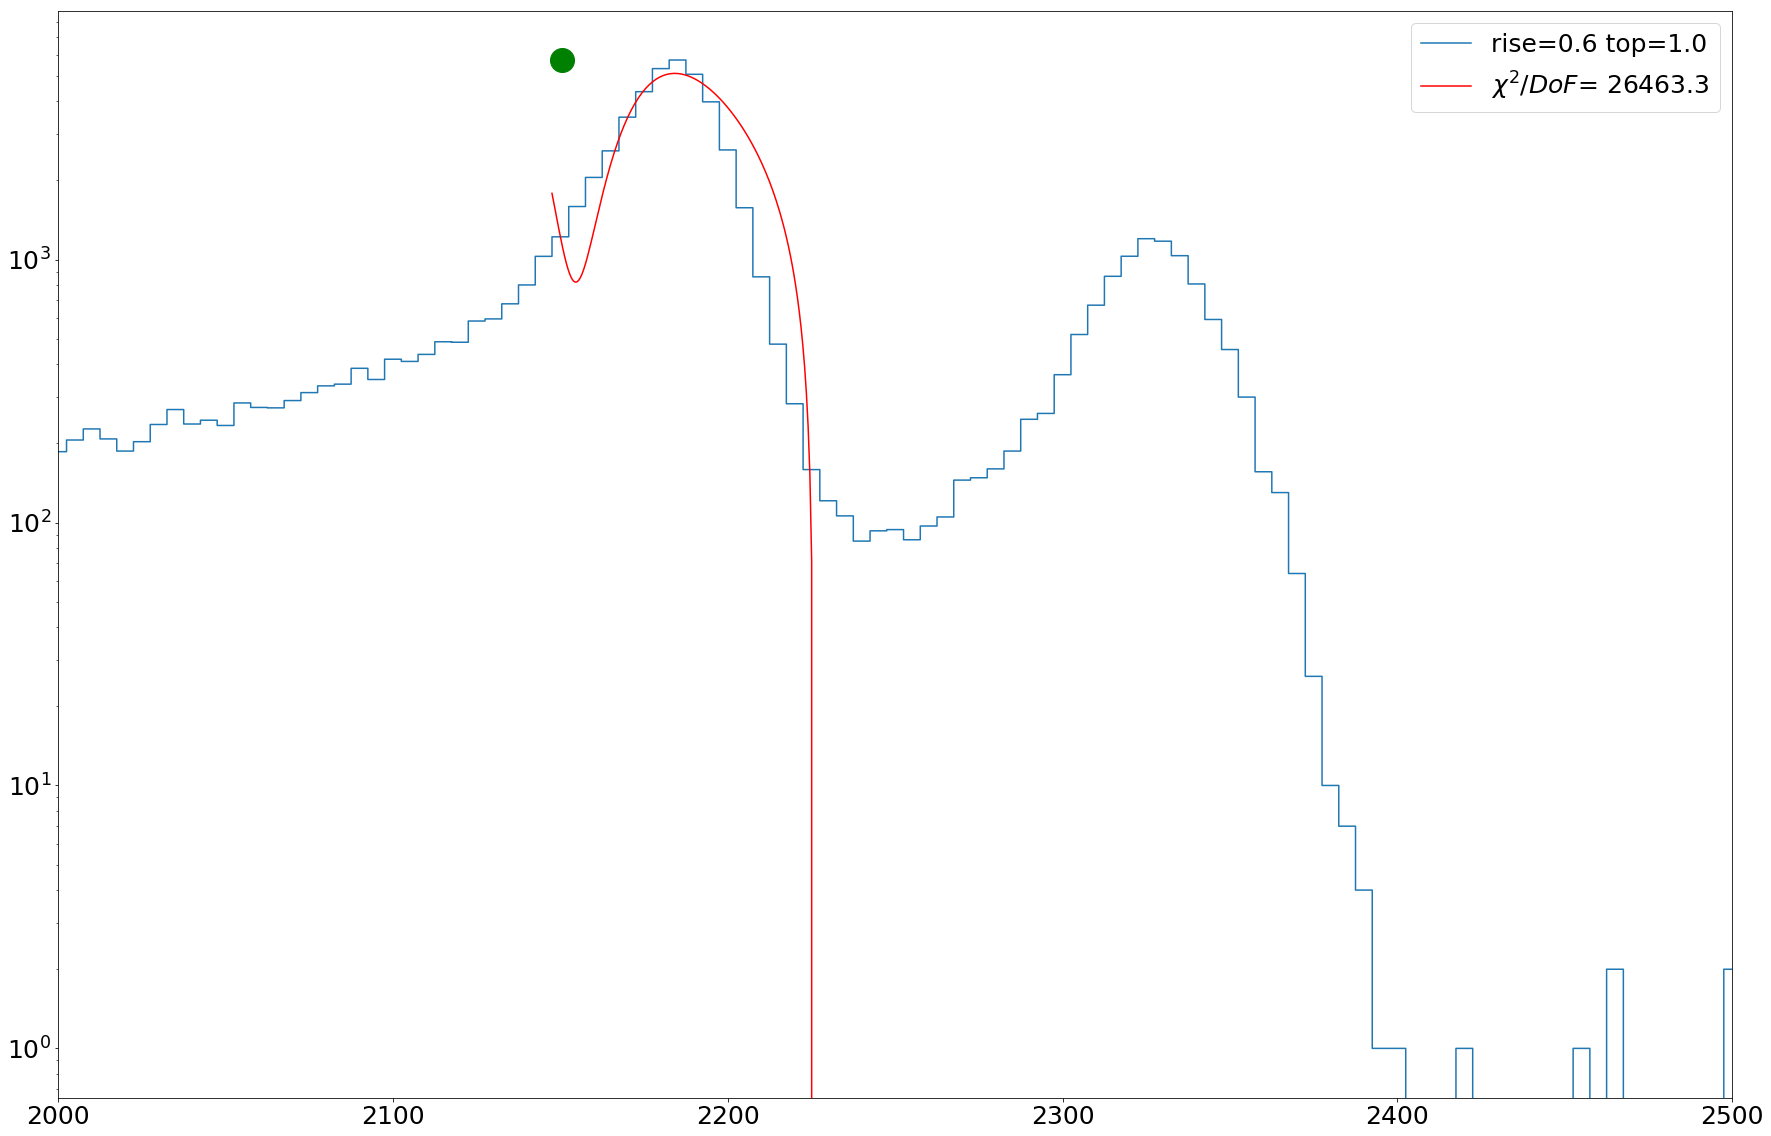

[  3.40243097e+03   2.18520518e+03  -1.00493999e+01   2.81702591e+01
  -5.93516265e+04] 14


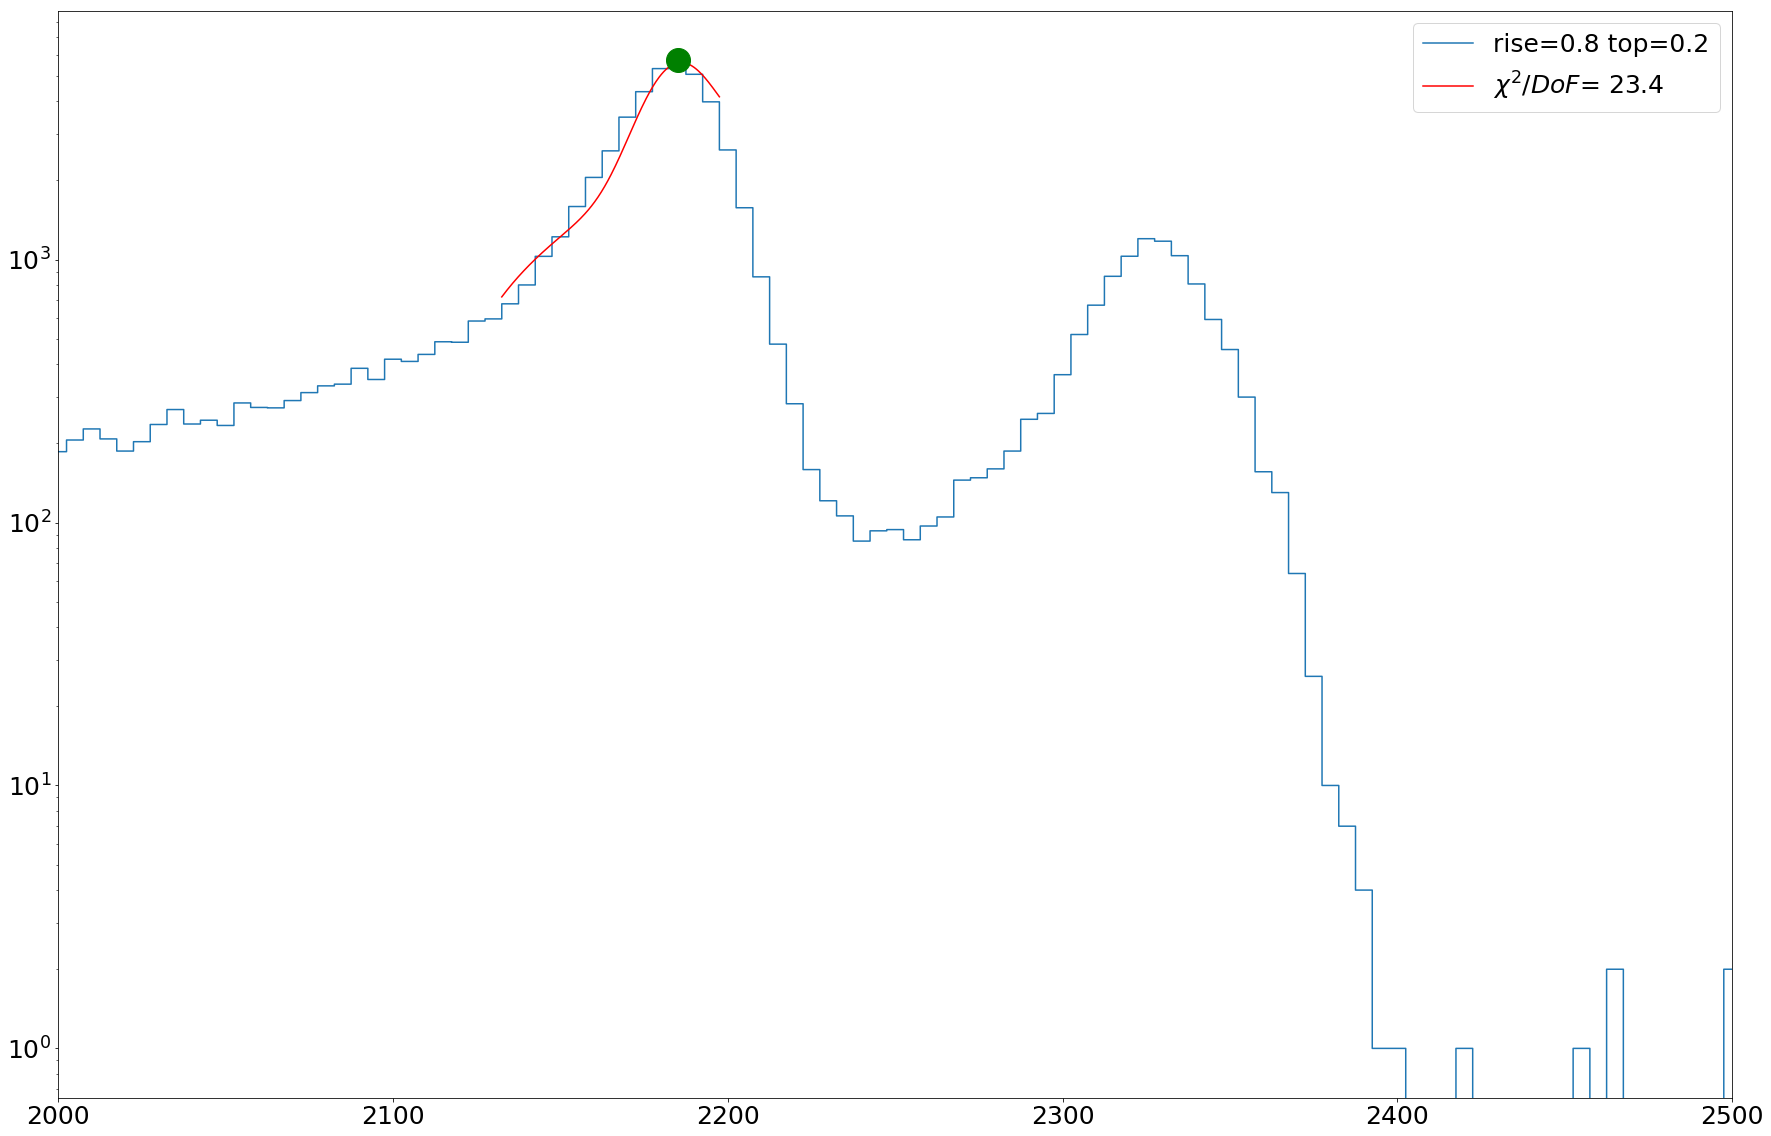

[  5.16054386e+03   2.18676040e+03  -1.32911849e+01  -1.34818830e+01
   2.99008457e+04] 17


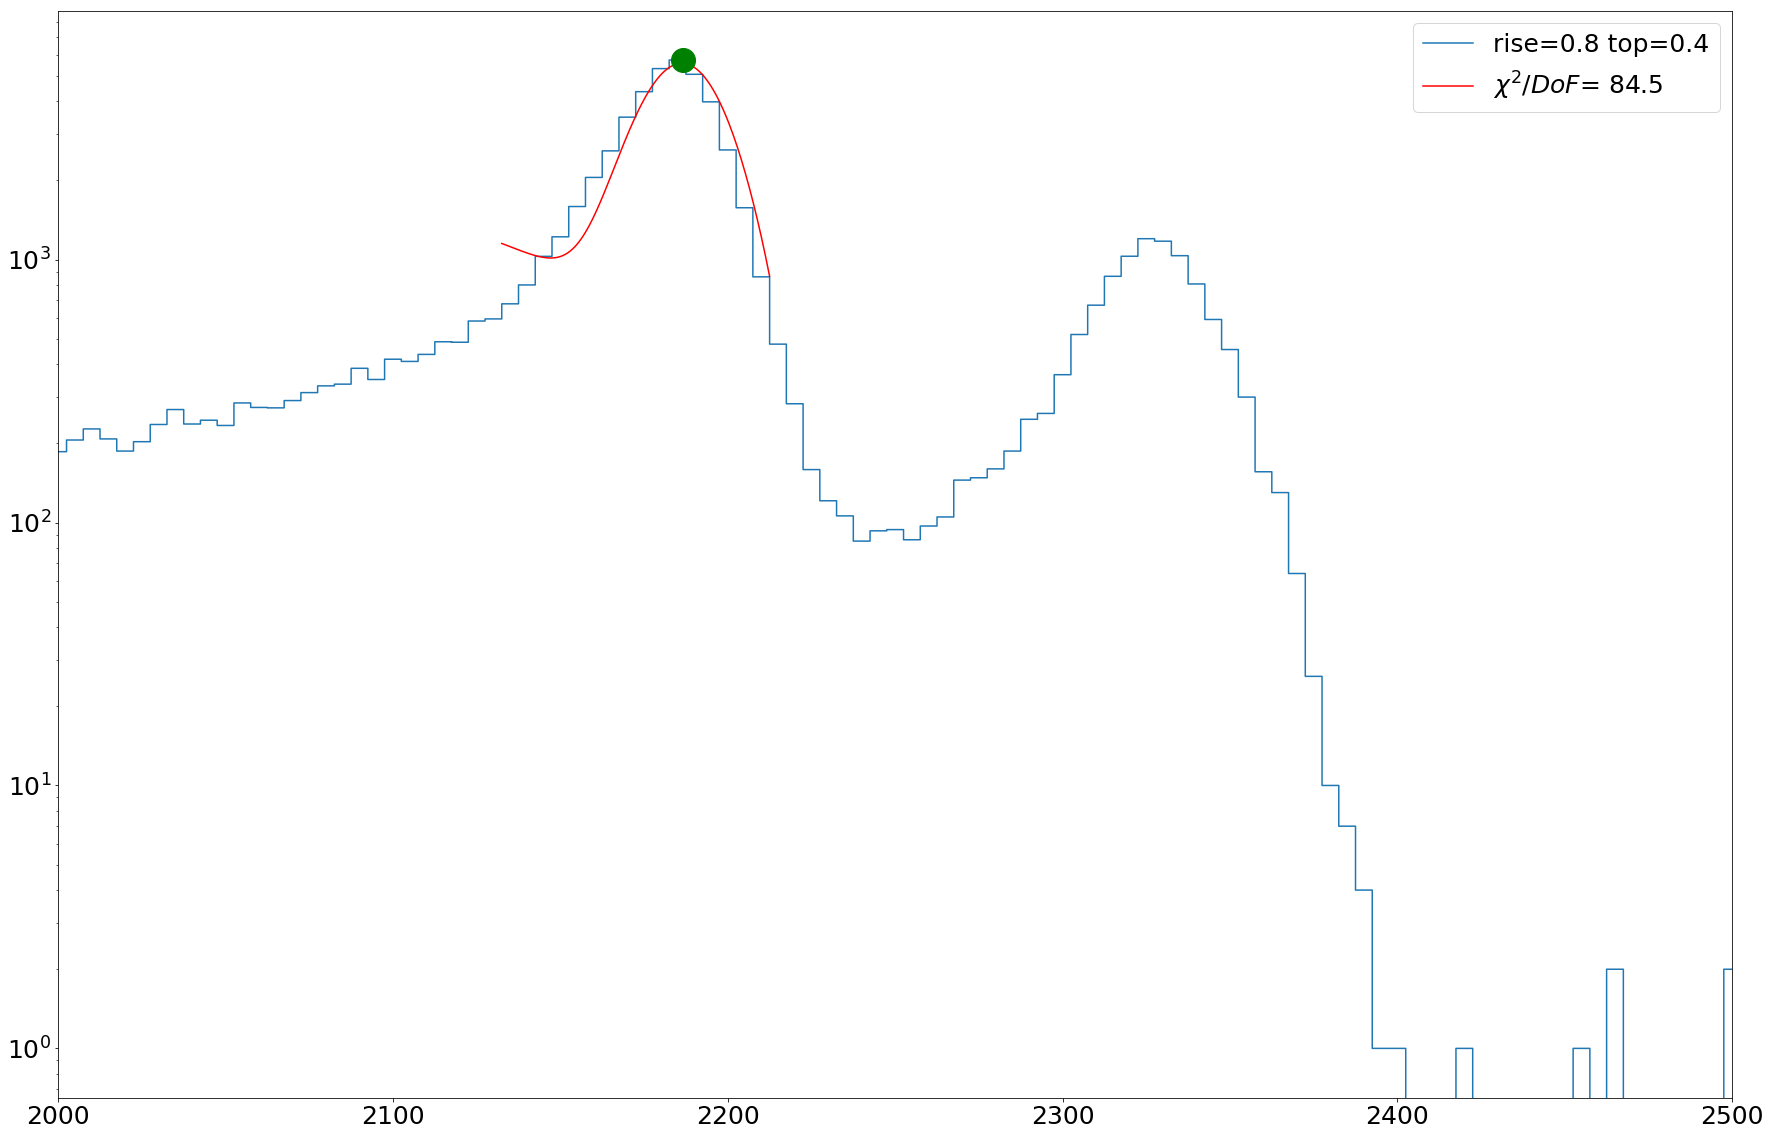

[  5.08377714e+03   2.18666846e+03  -1.31003314e+01  -1.18297360e+01
   2.63712087e+04] 20


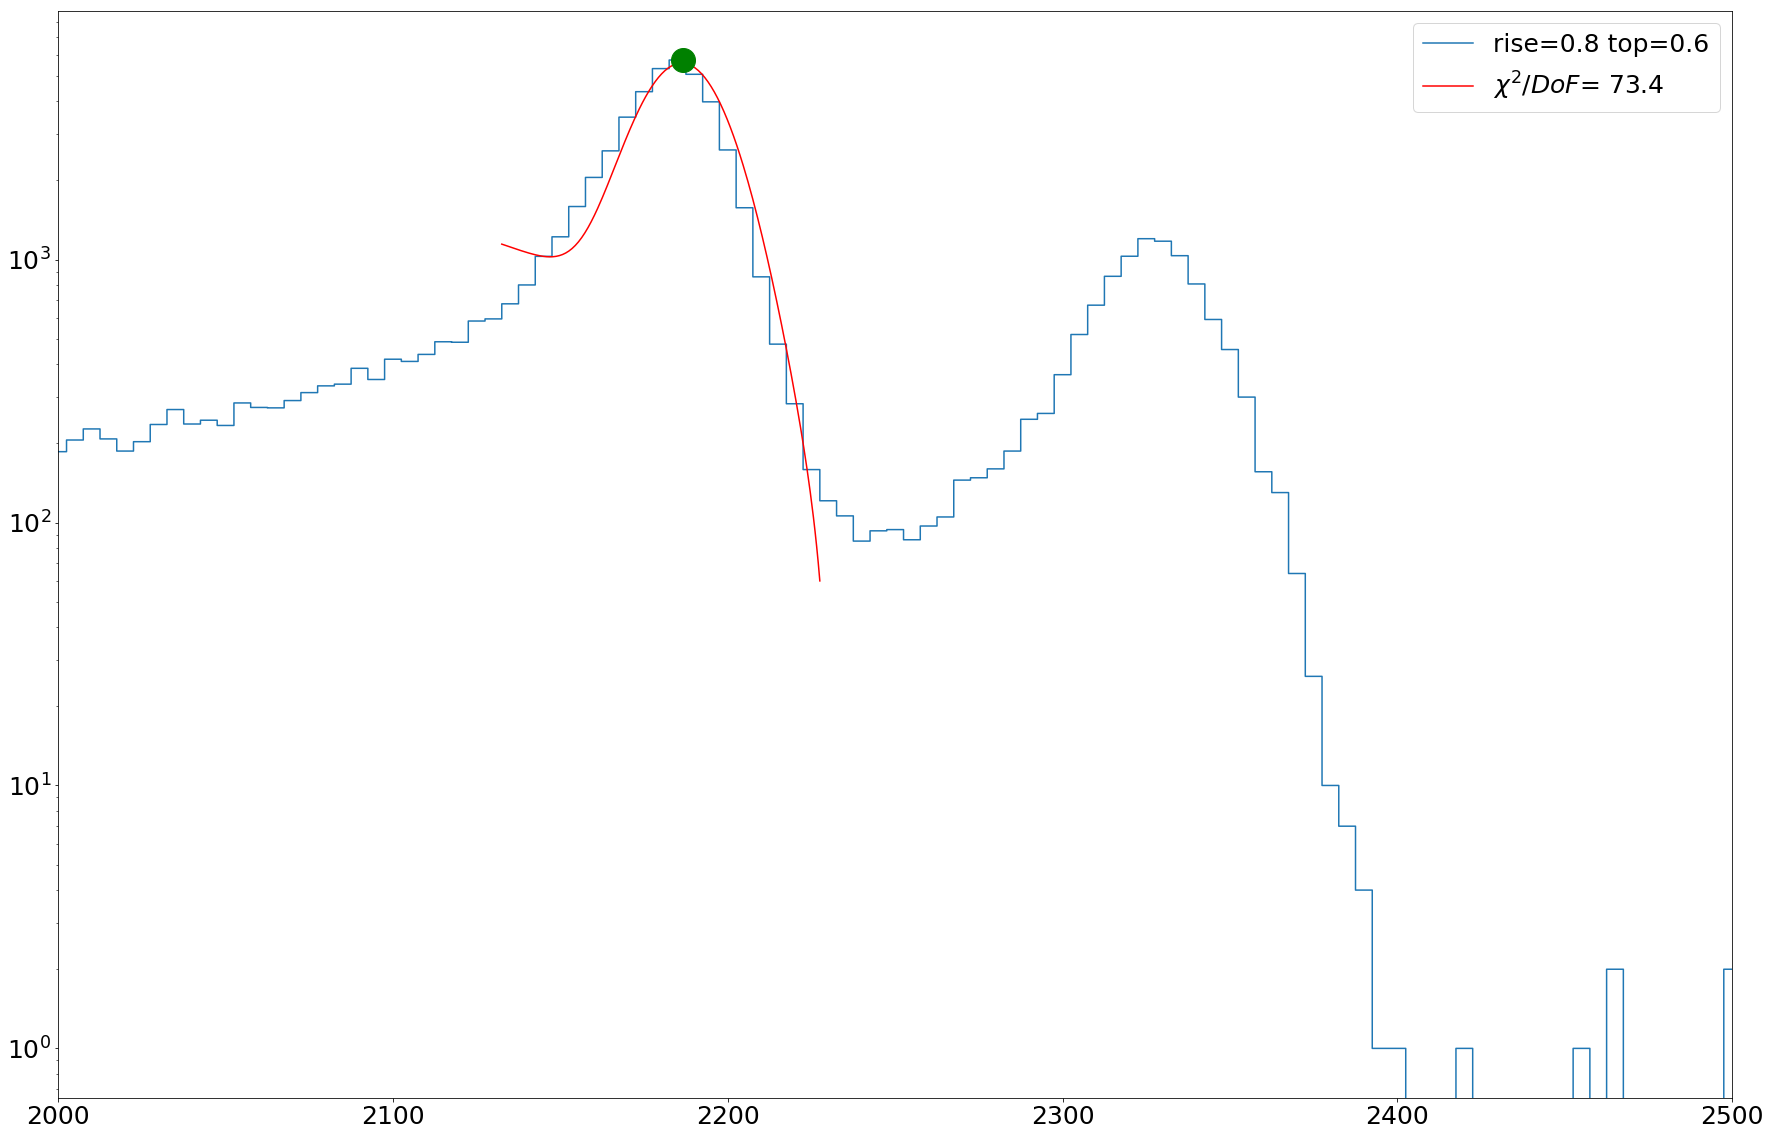

[  5.05676616e+03   2.18663285e+03  -1.30260967e+01  -1.12178975e+01
   2.50632797e+04] 23


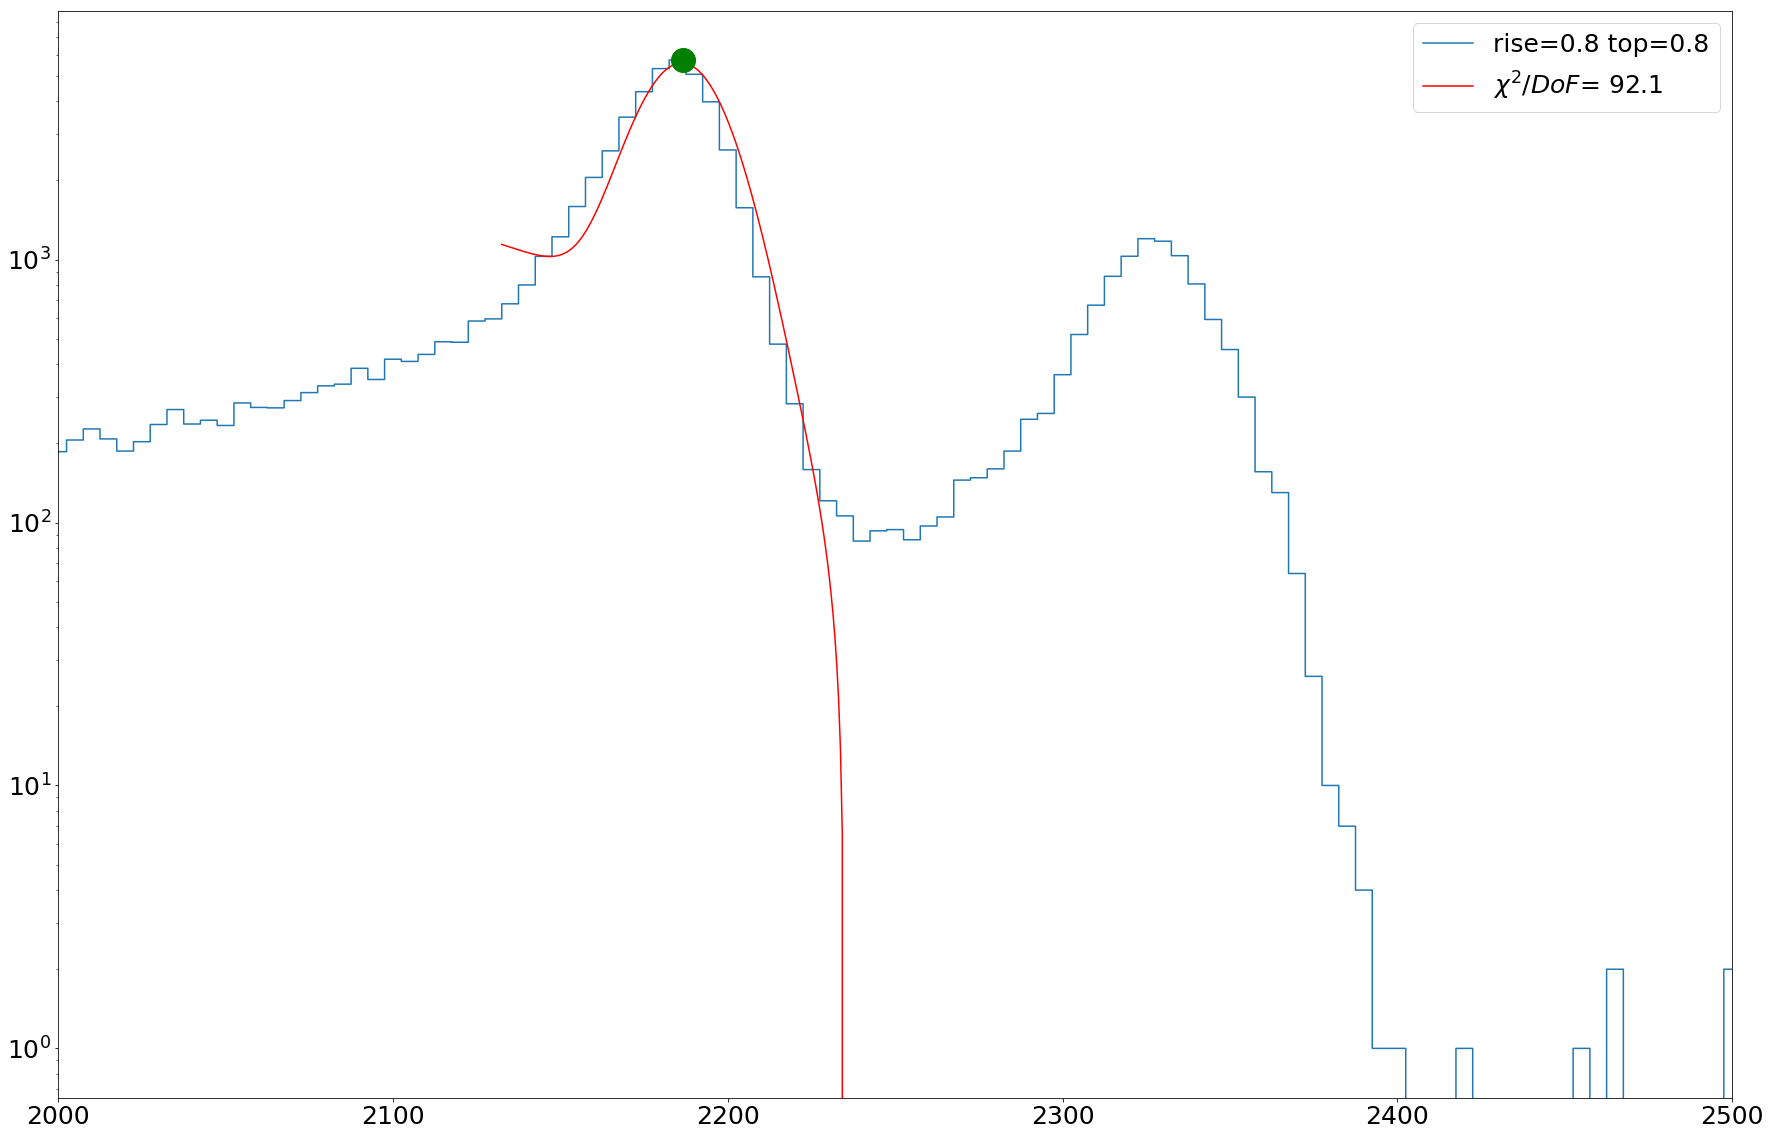

[  5.03687194e+03   2.18660484e+03  -1.29719254e+01  -1.07383897e+01
   2.40367895e+04] 25


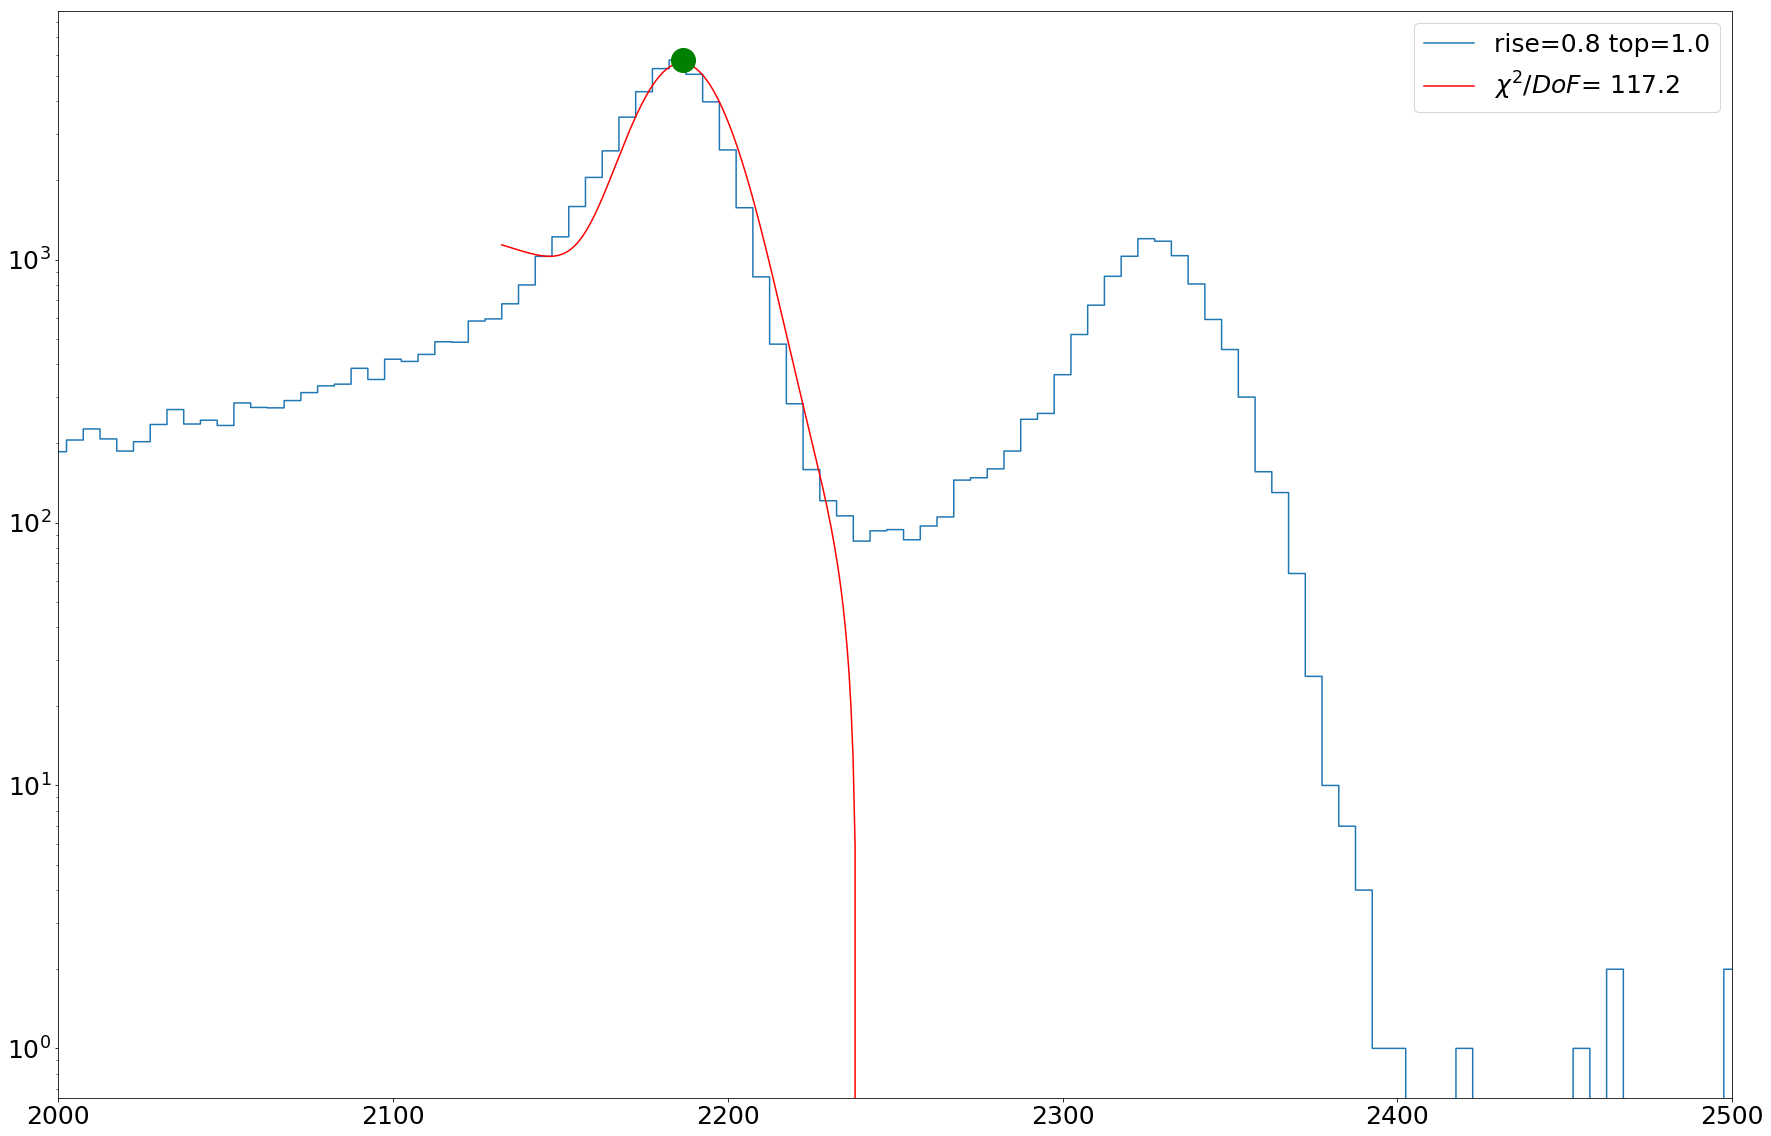

[  3.03574443e+03   2.18061929e+03   1.22056581e-02   8.11589829e+01
  -1.72749196e+05] 16


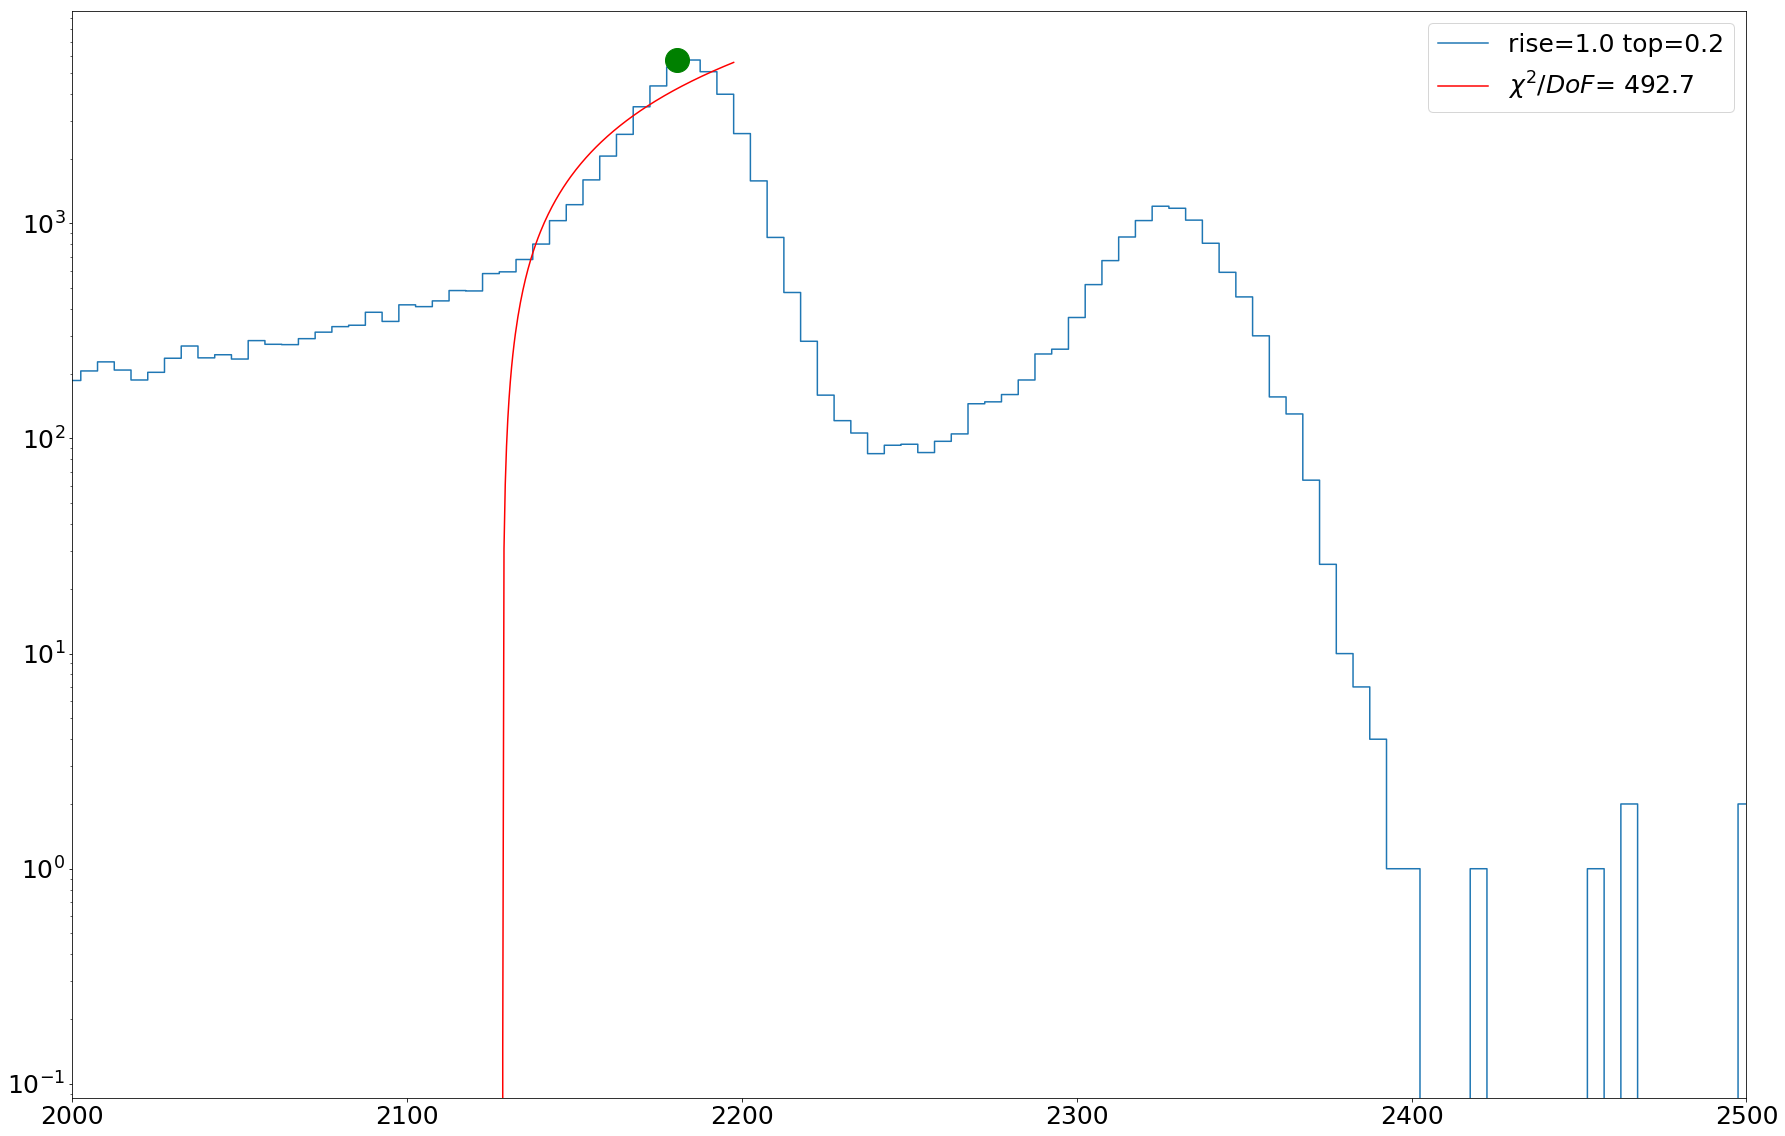

[  5.10554475e+03   2.18647924e+03   1.32578018e+01  -9.15616879e+00
   2.04915732e+04] 19


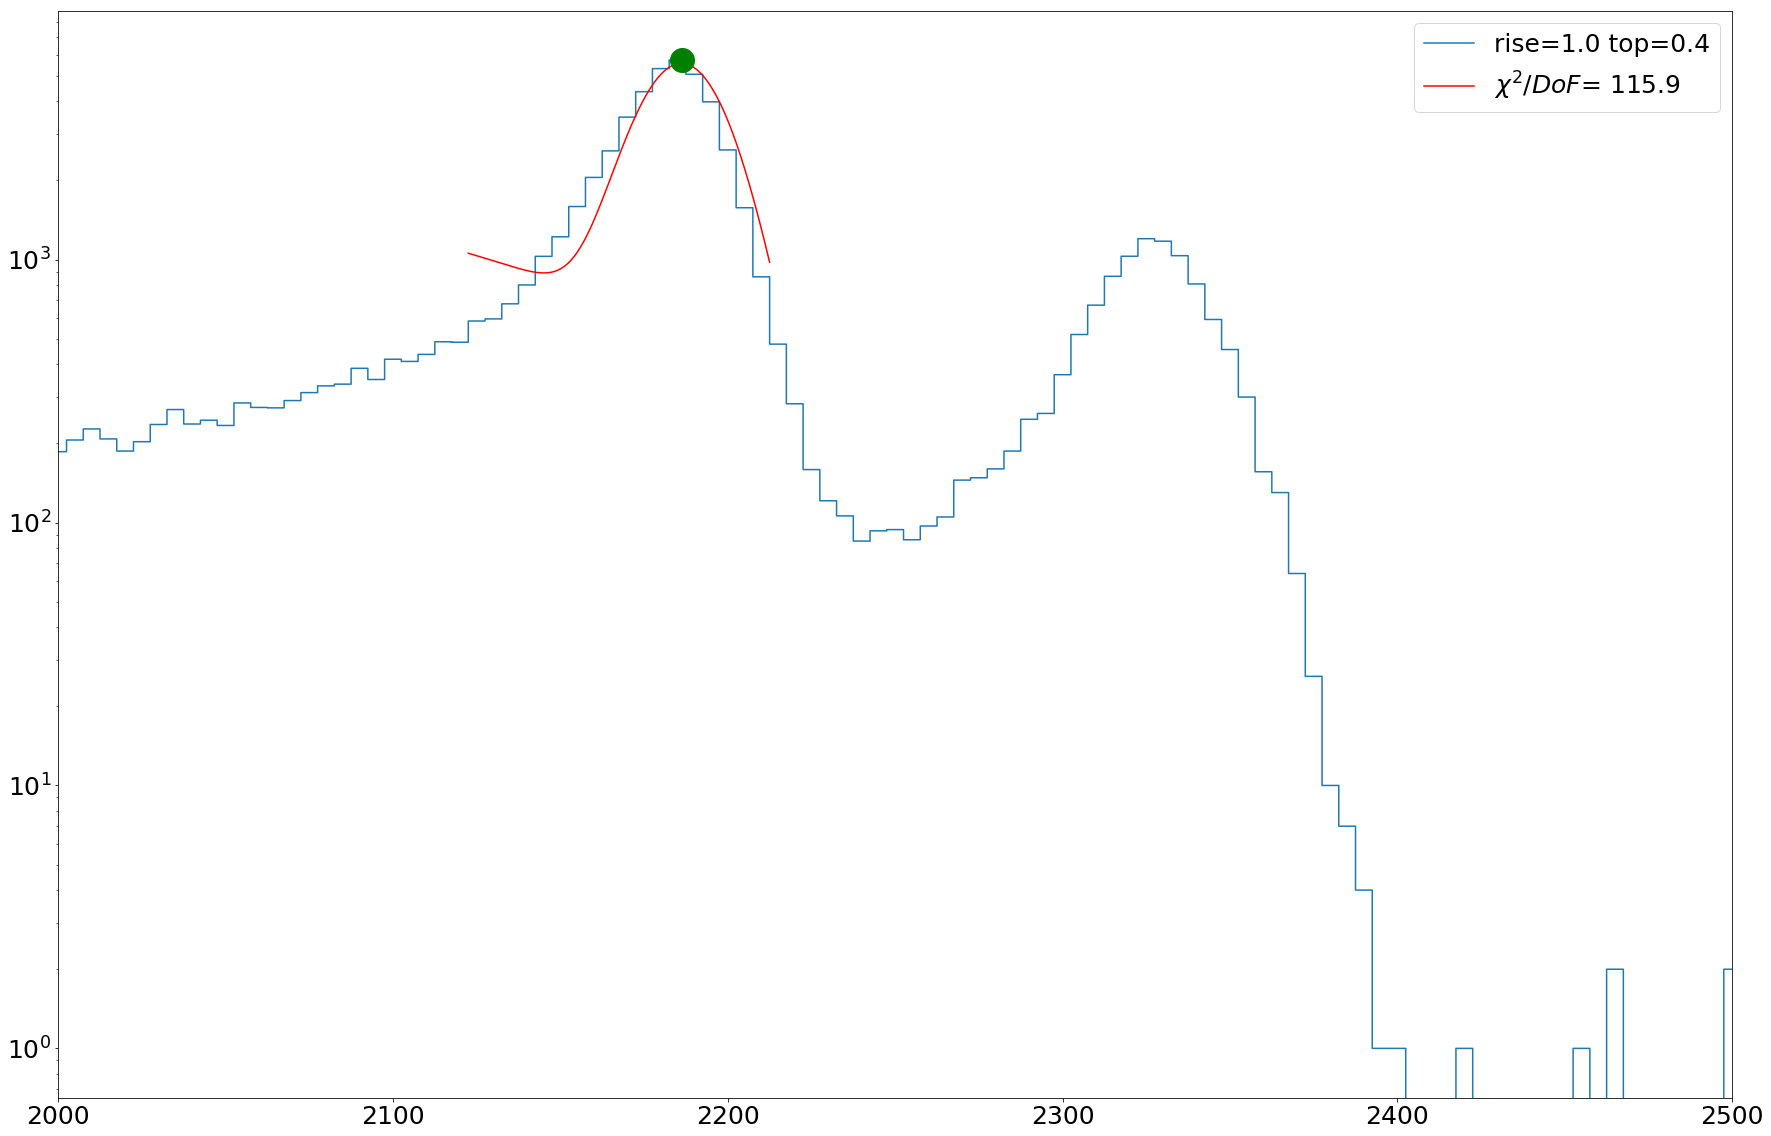

[  5.10967395e+03   2.18648303e+03  -1.32656587e+01  -9.23828186e+00
   2.06668748e+04] 22


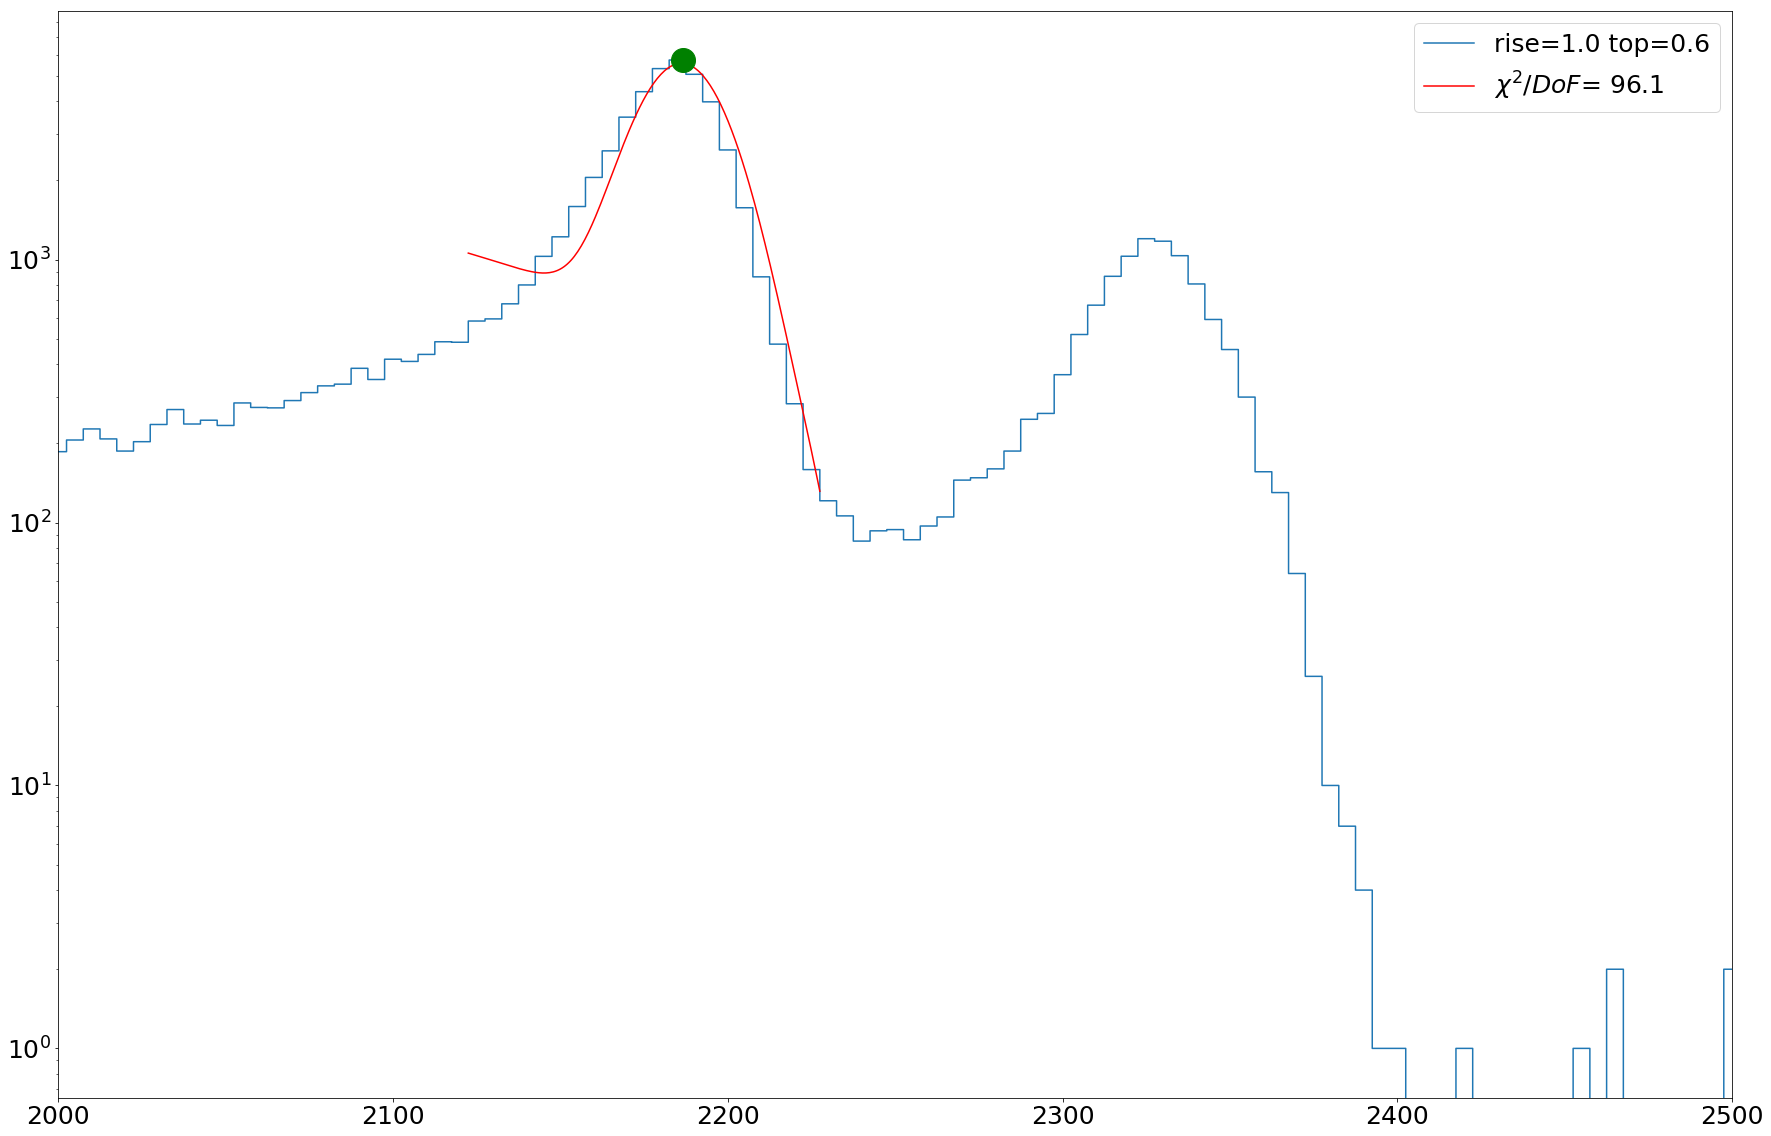

[  5.09527992e+03   2.18646575e+03  -1.32249869e+01  -8.93543095e+00
   2.00207417e+04] 25


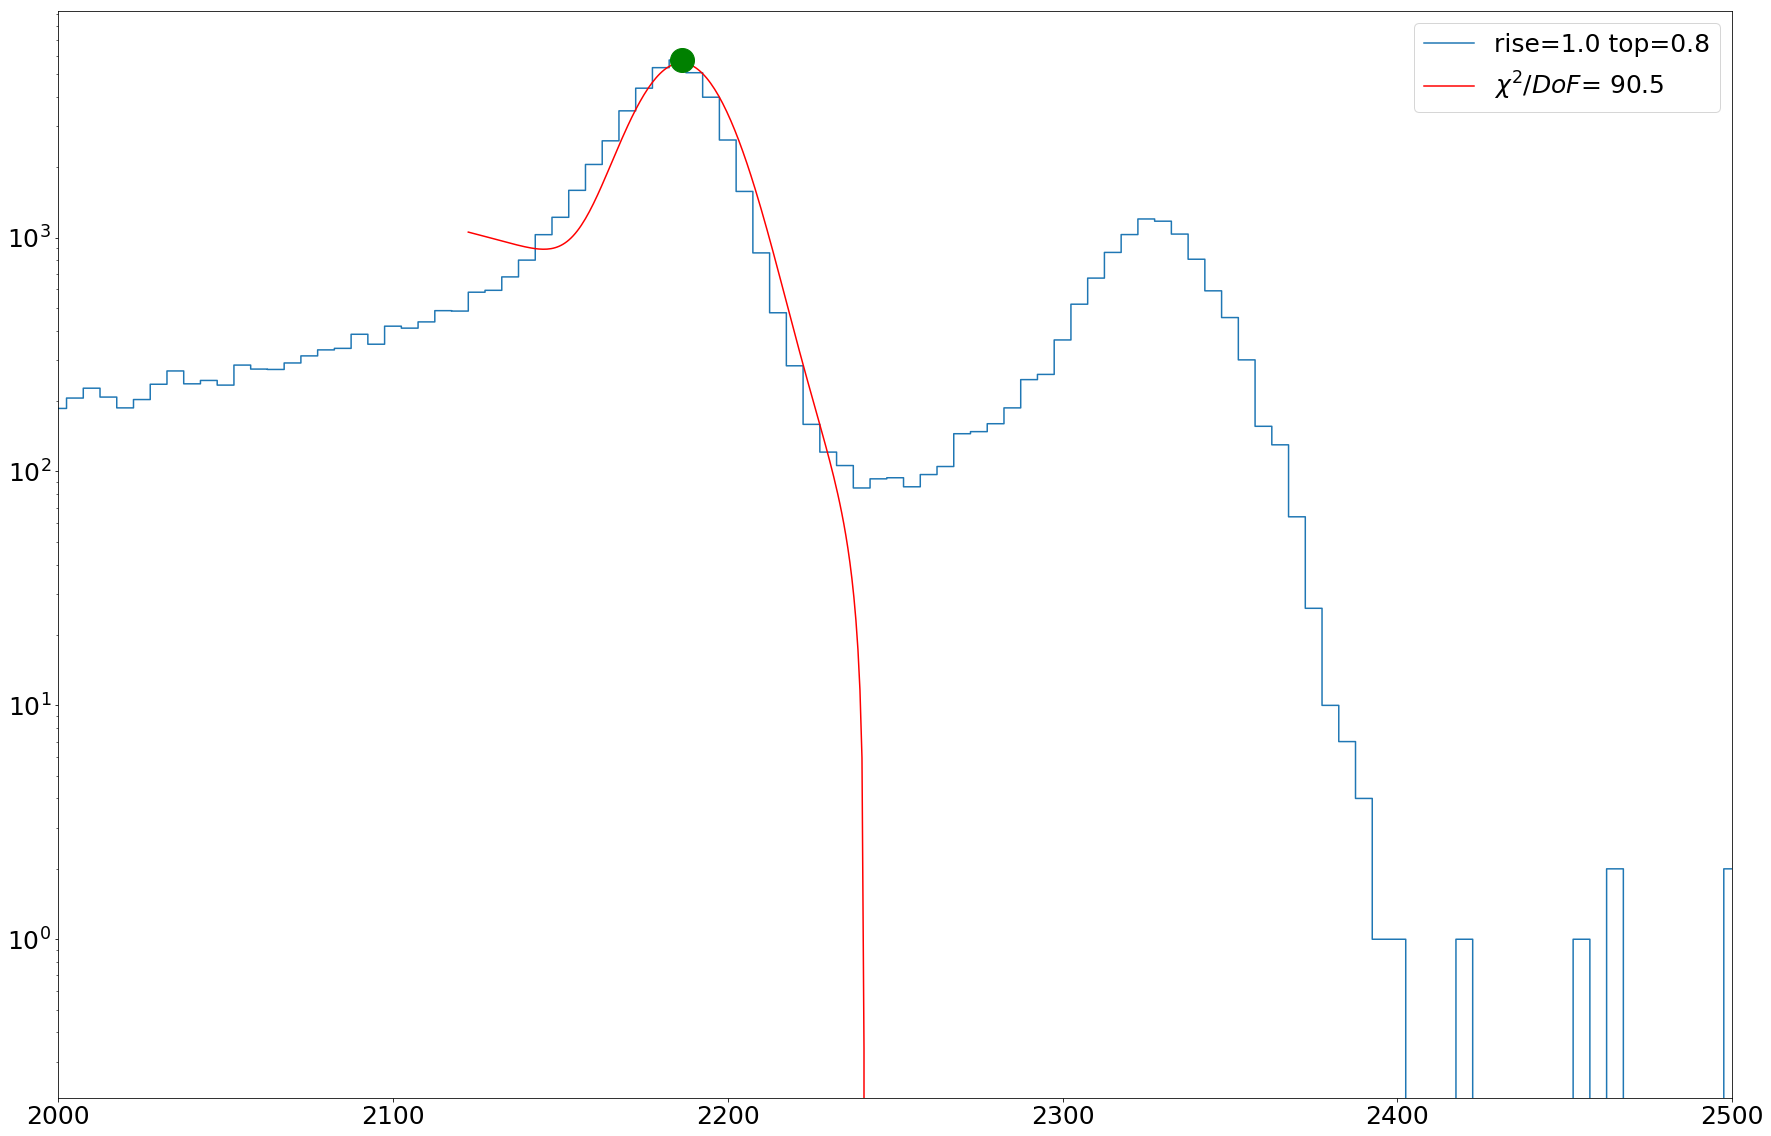

[  5.08160795e+03   2.18644848e+03  -1.31865288e+01  -8.63464907e+00
   1.93783182e+04] 27


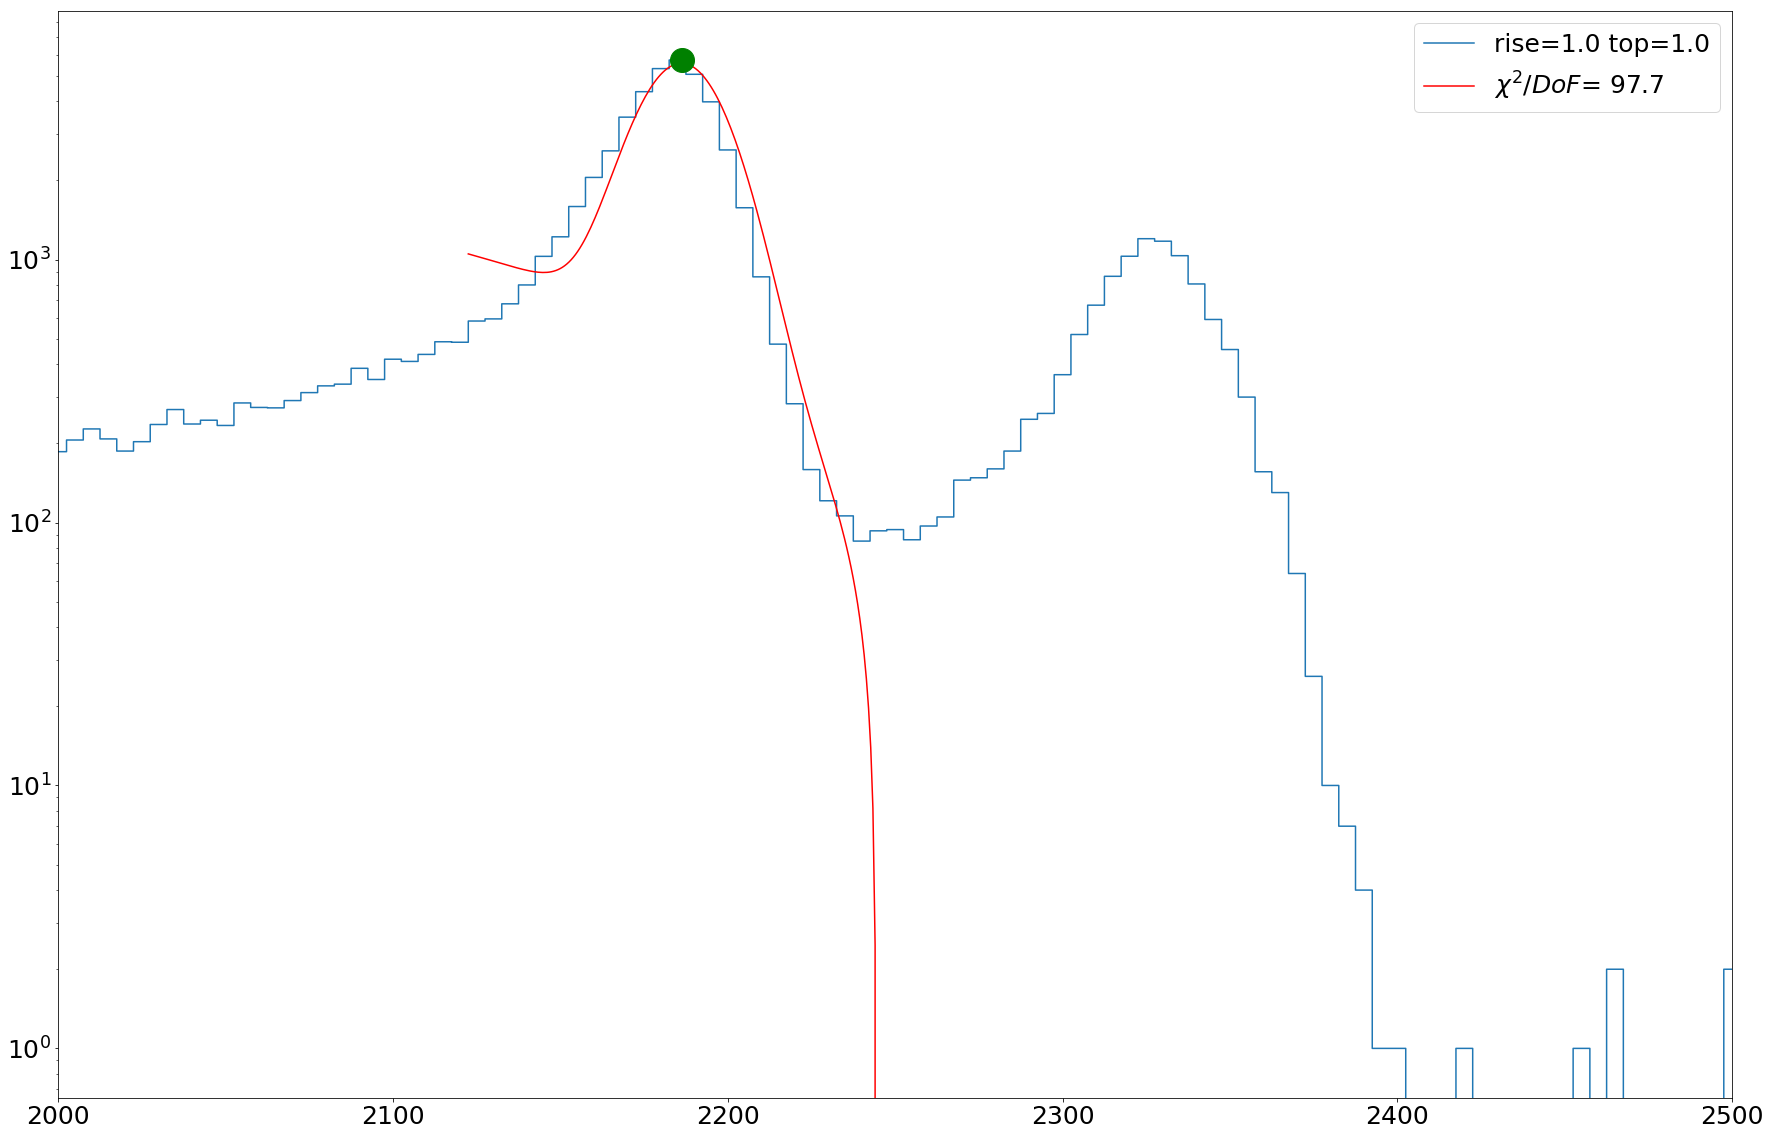

In [16]:
x=np.load('200-100-363-histbins.npy')
hist,bins= x[:,0],x[:,1]
start=len(bins)-np.sum(bins>1500)
amax= np.argmax(hist[start:])
window=14  #in bins
for i in np.linspace(0.2,1.,5):
    for j in np.linspace(0.2,1.,5):
        beg,end = bins[start+amax]-window*5*i,bins[start+amax]+window*5*j
        fitbins=bins[pd.land(bins>beg,bins<end)]
        fithist = hist[pd.land(bins>beg,bins<end)]
        fithist[fithist==0]=1
        weights=1./np.sqrt(fithist)
        pars=[hist[start+amax],bins[start+amax],30,1,1]
        pars=curve_fit(lingauss,fitbins,fithist,p0=pars,sigma=weights,maxfev=120000)[0]
        chisq= np.sum(((lingauss(fitbins,*pars)-fithist)*weights)**2.)
        chisq=chisq/(len(fitbins)-len(pars))
        plt.figure(figsize=(30,20))
        plt.plot(bins,hist,ls='steps',label='rise='+str(i)+' top='+str(j))
        plt.plot(np.linspace(min(fitbins),max(fitbins),200),lingauss(np.linspace(min(fitbins),max(fitbins),200),*pars),'r',label=r'$\chi^2/DoF$= %0.1f'%(chisq))
        #plt.plot(np.arange(1000,5000),lingauss(np.arange(1000,5000),0,pars[1],1,*pars[3:]))
        plt.plot(pars[1],max(hist[start:]),'go',markersize=24)
        plt.legend(fontsize=25)
        plt.yscale('log')
        plt.tick_params(labelsize=25)
        plt.xlim((2000,2500))
        print pars[:],len(fitbins)

        plt.show()

2159.54703101
2157.5


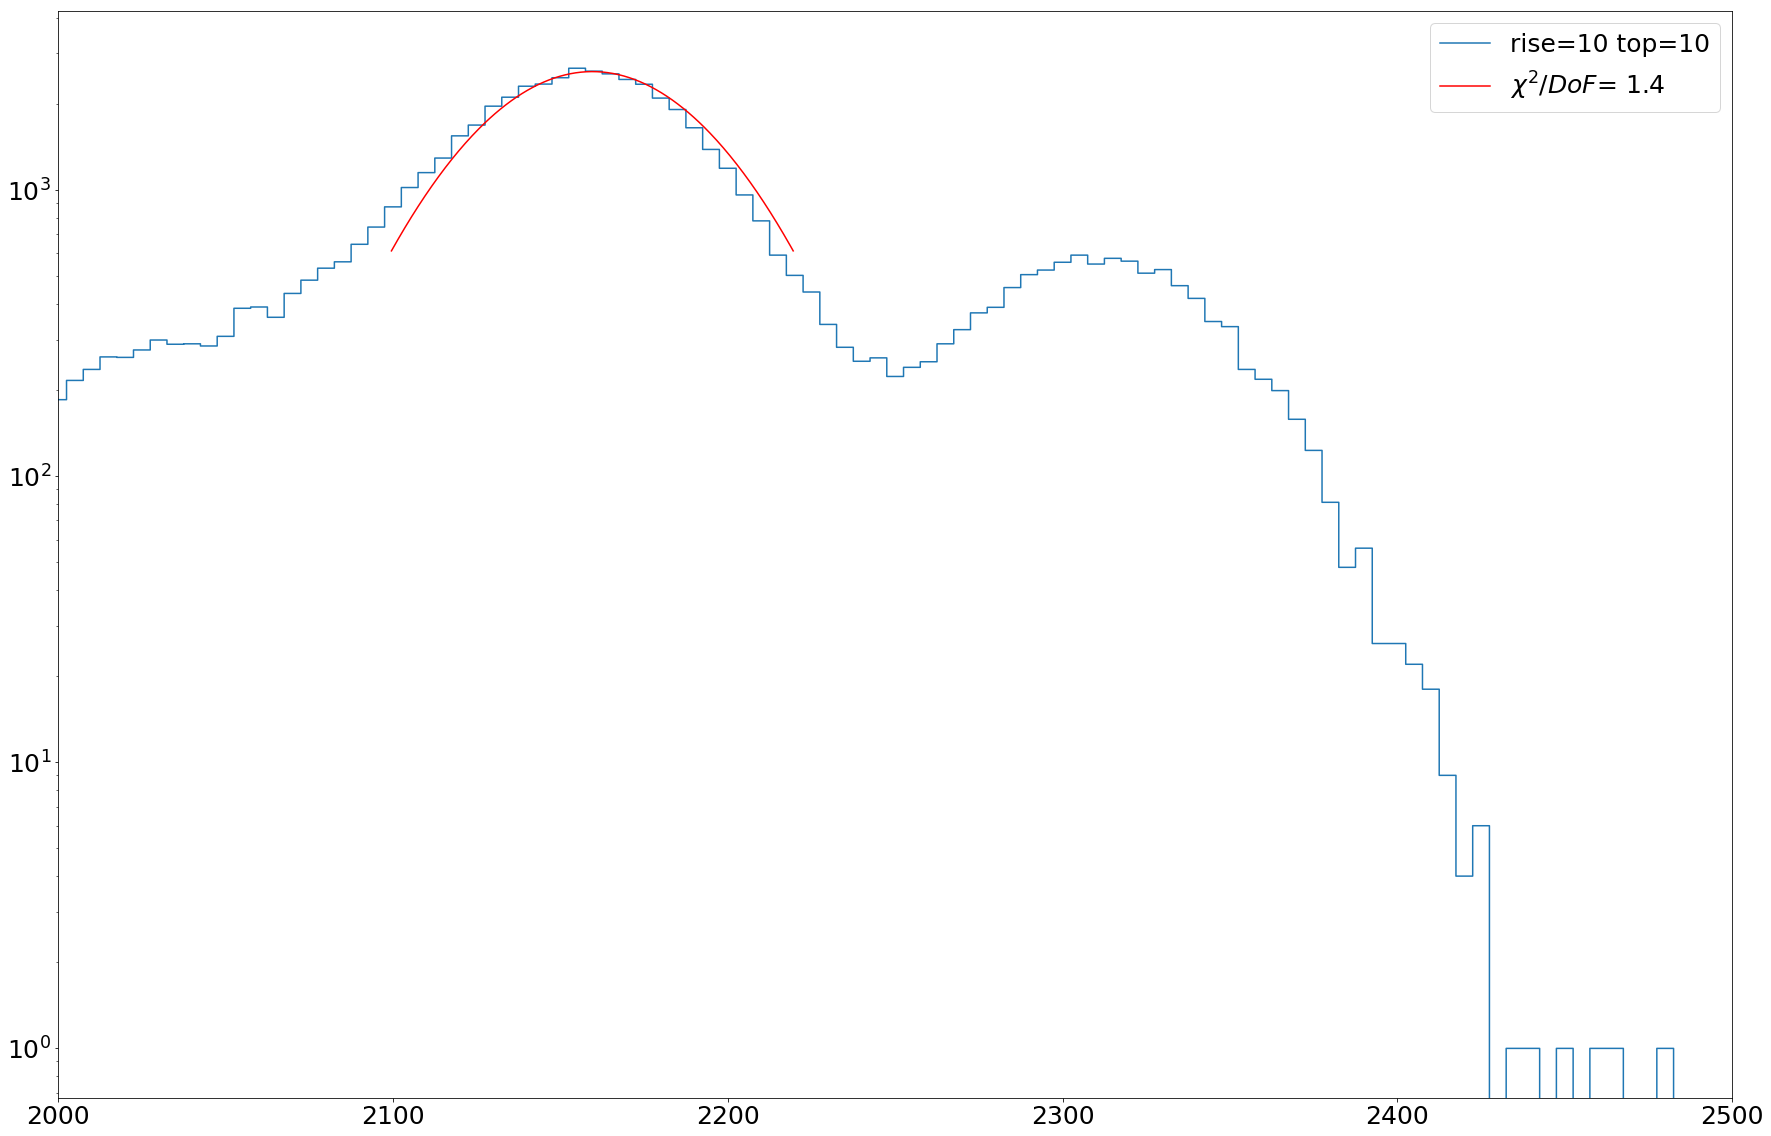

In [10]:
window=60
pts =np.concatenate((np.linspace(10,100,10,dtype=int),np.linspace(200,1000,9,dtype=int)))
count=0
for i in pts:
    for j in pts:
        if i==10 and j==100:
            arry=np.load(str(i)+'-'+str(j)+'-363-histbins.npy')
            hist=arry[:,0]
            bins=arry[:,1]
            amp,mx = sigs[count,2:4]
            print mx
            plotbins=np.linspace(mx-window,mx+window,300)
            start=len(bins)-np.sum(bins>1500)
            mx1=np.argmax(hist[start:])
            print bins[start+mx1]
            plt.figure(figsize=(30,20))
            plt.plot(bins,hist,ls='steps',label='rise='+str(i)+' top='+str(i))
            plt.plot(plotbins,gauss(plotbins,*sigs[count,2:5]),'r',label=r'$\chi^2/DoF$= %0.1f'%(sigs[count,5]))
            plt.legend(fontsize=25)
            plt.yscale('log')
            plt.tick_params(labelsize=25)
            plt.xlim((2000,2500))
            plt.show()
        count+=1

In [ ]:
sigs[10*19+10,:]